<a href="https://colab.research.google.com/github/Nelson-Mantilla/Nelson-Mantilla/blob/main/GRAFICOS%20DINAMICOS%20VIOLENCIAS%202015-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primero cargamos datos geograficos

Downloading...
From (original): https://drive.google.com/uc?id=1BJkNoXKDM4HRX9wUokMxogFVL6q6jVbQ
From (redirected): https://drive.google.com/uc?id=1BJkNoXKDM4HRX9wUokMxogFVL6q6jVbQ&confirm=t&uuid=2ae31ad8-1237-45cb-93ef-4ba5d29b75ed
To: /content/Municipios.json
100%|██████████| 191M/191M [00:02<00:00, 80.8MB/s]


  DPTOMPIO DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR MPIO_CCNCT  \
0    05001         05        001    MEDELLÍN      05001   
1    05002         05        002   ABEJORRAL      05002   
2    05004         05        004    ABRIAQUÍ      05004   
3    05021         05        021  ALEJANDRÍA      05021   
4    05030         05        030       AMAGÁ      05030   

                                            geometry  
0  POLYGON ((-75.66873 6.37318, -75.66888 6.37329...  
1  POLYGON ((-75.41645 5.90108, -75.4169 5.90064,...  
2  POLYGON ((-76.01161 6.64726, -76.01193 6.64741...  
3  POLYGON ((-74.98189 6.38306, -74.98201 6.38313...  
4  POLYGON ((-75.67424 6.0827, -75.67463 6.08258,...  


<Axes: >

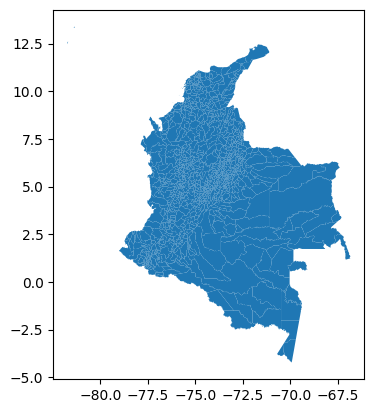

In [1]:
import gdown
import geopandas as gpd

# Reemplaza 'FILE_ID' con el ID del archivo
file_id = '1BJkNoXKDM4HRX9wUokMxogFVL6q6jVbQ'  # ID del archivo en Google Drive https://drive.google.com/file/d/1BJkNoXKDM4HRX9wUokMxogFVL6q6jVbQ/view?usp=drive_link
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo GeoJSON
gdown.download(url, 'Municipios.json', quiet=False)

# Cargar el archivo GeoJSON en GeoPandas
gdf = gpd.read_file('Municipios.json')
print(gdf.head())

# Visualizar el mapa
gdf.plot()

Filtramos para departamento del Meta

In [ ]:
# Filtrar por el departamento del Meta (código DANE: 50)
gdf_meta = gdf[gdf['DPTO_CCDGO'] == '50']

# Ahora vamos a añadir datos fiscalia

In [ ]:
!pip install gdown

In [ ]:
import gdown

# Reemplaza 'FILE_ID' con el ID del archivo
file_id = '1EVoBO591XIY5uD1CIxqT763-RAYQNytC'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo CSV
gdown.download(url, 'archivo.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EVoBO591XIY5uD1CIxqT763-RAYQNytC
To: /content/archivo.csv
100%|██████████| 536k/536k [00:00<00:00, 7.05MB/s]


'archivo.csv'

In [ ]:
import pandas as pd

# Leer el archivo CSV descargado
df = pd.read_csv('archivo.csv')

# Mostrar las primeras filas
print(df.head())

hacemos un grafico

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama `df` y contiene las columnas necesarias:
# SEXO, GRUPO_DELITO, TOTAL_VÍCTIMAS, MUNICIPIO_HECHO

# Agrupación por SEXO y GRUPO_DELITO, sumando las víctimas.
grouped_data = df.groupby(["SEXO", "GRUPO_DELITO"])["TOTAL_VÍCTIMAS"].sum().reset_index()

# Estilo de gráficos de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 7))
sns.barplot(
    data=grouped_data,
    x="GRUPO_DELITO",
    y="TOTAL_VÍCTIMAS",
    hue="SEXO",
    palette="coolwarm"
)

# Personalizaciones estéticas
plt.title("Total de Víctimas por Sexo y Grupo de Delito", fontsize=16, weight='bold', pad=20)
plt.xlabel("Grupo de Delito", fontsize=14, labelpad=10)
plt.ylabel("Total de Víctimas", fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title="Sexo", title_fontsize=12, fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el área de gráficos con dos filas y ajustar el tamaño de la figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1.5], 'hspace': 0.4, 'wspace': 0.3})

# Gráfico 1: Total de víctimas para FEMENINO
sns.barplot(
    data=data_femenino,
    x="GRUPO_DELITO",
    y="TOTAL_VÍCTIMAS",
    ax=axes[0, 0],
    color="#dd8452"
)
axes[0, 0].set_title("Total de Víctimas (Femenino)", fontsize=12)
axes[0, 0].set_xlabel("Grupo de Delito", fontsize=10)
axes[0, 0].set_ylabel("Total de Víctimas", fontsize=10)
axes[0, 0].bar_label(axes[0, 0].containers[0], fmt='%.0f', fontsize=8)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0, 0].tick_params(axis='y', labelsize=8)

# Gráfico 2: Total de víctimas para MASCULINO
sns.barplot(
    data=data_masculino,
    x="GRUPO_DELITO",
    y="TOTAL_VÍCTIMAS",
    ax=axes[0, 1],
    color="#4c72b0"
)
axes[0, 1].set_title("Total de Víctimas (Masculino)", fontsize=12)
axes[0, 1].set_xlabel("Grupo de Delito", fontsize=10)
axes[0, 1].set_ylabel("Total de Víctimas", fontsize=10)
axes[0, 1].bar_label(axes[0, 1].containers[0], fmt='%.0f', fontsize=8)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=8)
axes[0, 1].tick_params(axis='y', labelsize=8)

# Gráfico 3: Participación porcentual por sexo en cada grupo de delito (barras apiladas)
# Calcular los porcentajes para cada grupo de delito y sexo
data_porcentaje_pivot = data_porcentaje.pivot_table(index="GRUPO_DELITO", columns="SEXO", values="Porcentaje", aggfunc="sum")

# Graficar las barras apiladas
ax = data_porcentaje_pivot.plot(kind="bar", stacked=True, ax=axes[1, 0], color=["#dd8452", "#4c72b0", "#55a868"])
axes[1, 0].set_title("Participación por Sexo (%)", fontsize=12)
axes[1, 0].set_xlabel("Grupo de Delito", fontsize=10)
axes[1, 0].set_ylabel("Porcentaje", fontsize=10)
axes[1, 0].set_ylim(0, 100)  # Limitar el eje Y al 100%
axes[1, 0].legend(title="Sexo", title_fontsize=10, fontsize=8, loc='upper left', bbox_to_anchor=(1, 1))
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)
axes[1, 0].tick_params(axis='y', labelsize=8)

# Eliminar el cuarto subplot vacío
fig.delaxes(axes[1, 1])

# Ajustar diseño general
plt.tight_layout()

# Mostrar gráficos
plt.show()



# HACER UN DOCUMENTO RESUMIENDO LAS VICTIMAS POR MUNICIPIO

In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from docx import Document

# Filtrar datos por sexo FEMENINO
df_femenino = df[df['SEXO'] == 'FEMENINO']

# Agrupar por MUNICIPIO_HECHO y GRUPO_DELITO, sumando TOTAL_VÍCTIMAS
resumen = (
    df_femenino.groupby(['MUNICIPIO_HECHO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS']
    .sum()
    .reset_index()
)

# Crear una tabla pivote para mostrar cada municipio y sus totales por grupo de delito
pivot_table = resumen.pivot_table(
    index='MUNICIPIO_HECHO',
    columns='GRUPO_DELITO',
    values='TOTAL_VÍCTIMAS',
    aggfunc='sum',
    fill_value=0
)

# Agregar una columna de total general por municipio y ordenar
pivot_table['TOTAL_GENERAL'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='TOTAL_GENERAL', ascending=False)

# Crear el documento de Word
doc = Document()
doc.add_heading('Resumen de Víctimas Femeninas por Municipio y Grupo de Delito', level=1)

# Crear la tabla
table = doc.add_table(rows=1, cols=len(pivot_table.columns) + 1)
table.style = 'Table Grid'

# Encabezados
headers = ['MUNICIPIO_HECHO'] + list(pivot_table.columns)
for i, header in enumerate(headers):
    table.cell(0, i).text = header

# Agregar filas a la tabla
for municipio, row in pivot_table.iterrows():
    cells = table.add_row().cells
    cells[0].text = municipio  # Nombre del municipio
    for i, value in enumerate(row):
        cells[i + 1].text = str(value)

# Guardar el documento
doc.save('resumen_municipios_victimas_femeninas.docx')

print("Documento generado: 'resumen_municipios_victimas_femeninas.docx'")


Documento generado: 'resumen_municipios_victimas_femeninas.docx'


#VAMOS A HACER UN ANALISIS DEL PERIODO 2015 - 2024

CARGAMOS LOS DATOS DE LA FISCALÍA

In [ ]:
import gdown

# Reemplaza 'FILE_ID' con el ID del archivo
file_id = '16lgfL12TLOspO09uXXTsXQdWNiuOB0Jq'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo CSV
gdown.download(url, 'archivo.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16lgfL12TLOspO09uXXTsXQdWNiuOB0Jq
To: /content/archivo.csv
100%|██████████| 6.86M/6.86M [00:00<00:00, 34.8MB/s]


'archivo.csv'

In [ ]:
import pandas as pd

# Leer el archivo CSV descargado
df = pd.read_csv('archivo.csv')

# Mostrar las primeras filas
print(df)

      CRIMINALIDAD ES_ARCHIVO ES_PRECLUSIÓN    ESTADO          ETAPA_CASO  \
0               SI         NO            NO  INACTIVO  EJECUCIÓN DE PENAS   
1               SI         NO            NO    ACTIVO          INDAGACIÓN   
2               NO         SI            NO  INACTIVO          INDAGACIÓN   
3               SI         NO            NO    ACTIVO          INDAGACIÓN   
4               SI         NO            NO  INACTIVO  EJECUCIÓN DE PENAS   
...            ...        ...           ...       ...                 ...   
28105           SI         NO            NO    ACTIVO              JUICIO   
28106           SI         SI            NO  INACTIVO          INDAGACIÓN   
28107           SI         SI            NO  INACTIVO          INDAGACIÓN   
28108           NO         SI            NO  INACTIVO          INDAGACIÓN   
28109           SI         NO            NO  INACTIVO          INDAGACIÓN   

            LEY PAÍS_HECHO DEPARTAMENTO_HECHO       MUNICIPIO_HECHO  \
0   

# GRAFICOS

GRAFICO DE SERIE DE TIEMPO

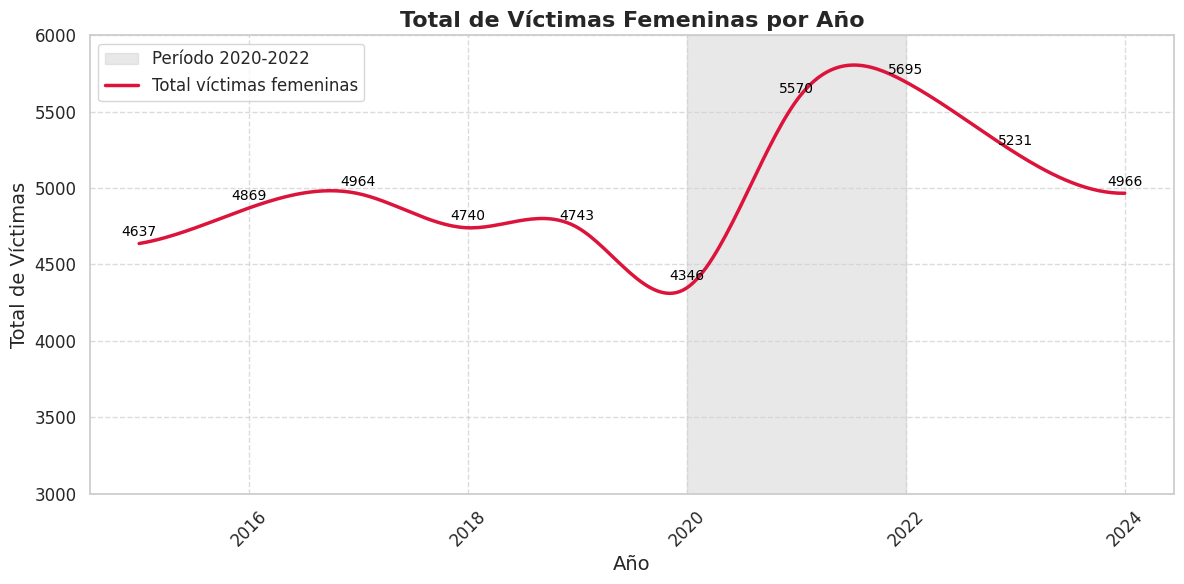

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

# Filtrar solo las filas con SEXO = 'FEMENINO'
df_femenino = df[df['SEXO'] == 'FEMENINO']

# Agrupar por año y sumar las víctimas
serie_tiempo = df_femenino.groupby('AÑO_HECHOS')['TOTAL_VÍCTIMAS'].sum()

# Crear puntos interpolados para suavizar la línea
x_original = serie_tiempo.index
y_original = serie_tiempo.values
x_smooth = np.linspace(x_original.min(), x_original.max(), 300)
y_smooth = make_interp_spline(x_original, y_original)(x_smooth)

# Estilizar el gráfico con seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Resaltar el período 2020-2022 con un rectángulo
plt.axvspan(2020, 2022, color='lightgray', alpha=0.5, label='Período 2020-2022')

# Trazar la línea suavizada
plt.plot(x_smooth, y_smooth, color='crimson', linewidth=2.5, label='Total víctimas femeninas')

# Añadir etiquetas con los valores en cada año
for x, y in zip(x_original, y_original):
    plt.text(x, y + 50, f'{int(y)}', ha='center', fontsize=10, color='black')

# Personalizar el título y etiquetas
plt.title('Total de Víctimas Femeninas por Año', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total de Víctimas', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')

# Ajustar límites del eje Y entre 3000 y 6000
plt.ylim(3000, 6000)

# Mostrar cuadrícula más suave
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


total mujeres victimas por grupo de delito periodo 2015 - 2024

<Figure size 1200x800 with 0 Axes>

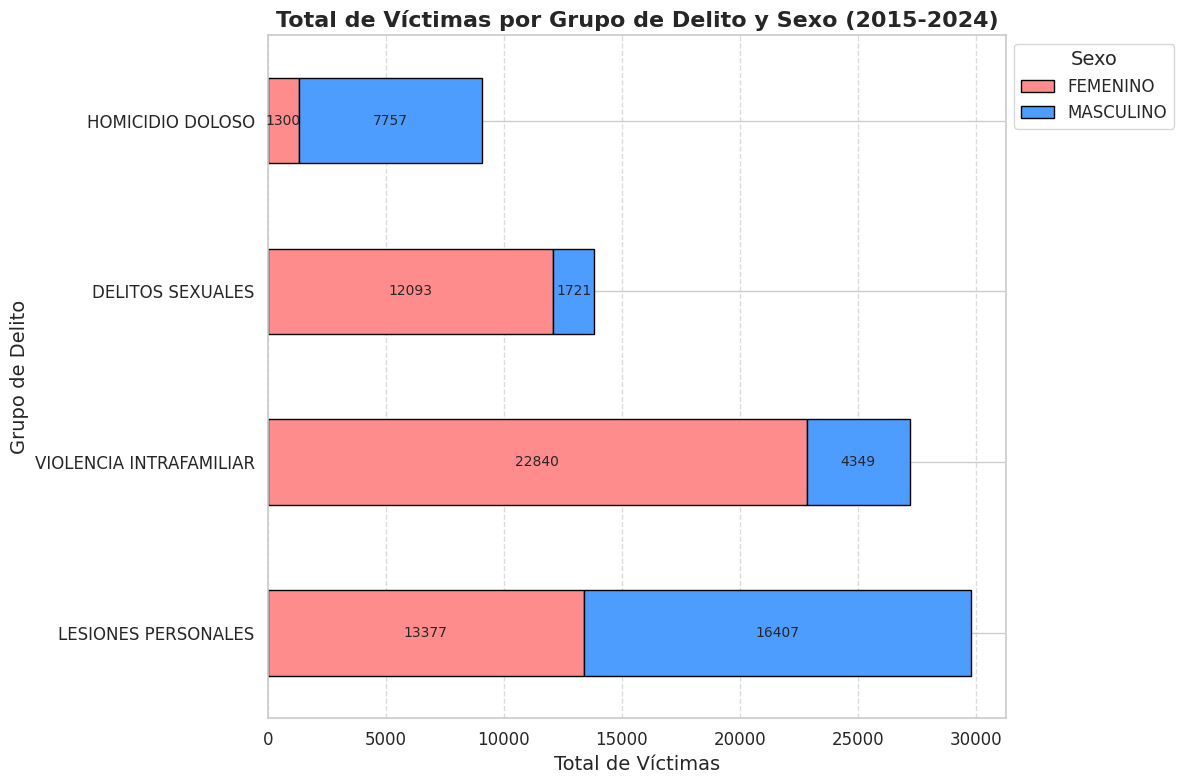

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar para excluir el grupo de delito "FEMINICIDIO" y el grupo "SIN DATO" en SEXO
df_filtered = df[(df['GRUPO_DELITO'] != 'FEMINICIDIO') & (df['SEXO'] != 'SIN DATO')]

# Agrupar por grupo de delito y sexo, sumando las víctimas
grupo_delito_sexo = df_filtered.groupby(['GRUPO_DELITO', 'SEXO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

# Ordenar por el total de víctimas
grupo_delito_sexo['TOTAL'] = grupo_delito_sexo.sum(axis=1)
grupo_delito_sexo = grupo_delito_sexo.sort_values(by='TOTAL', ascending=False).drop(columns=['TOTAL'])

# Estilizar el gráfico con seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))

# Definir colores para FEMENINO y MASCULINO
colors = ['#FF8C8C', '#4C9DFF']  # Rosa claro para FEMENINO y azul claro para MASCULINO

# Trazar las barras apiladas
ax = grupo_delito_sexo.plot(
    kind='barh',
    stacked=True,
    color=colors,
    figsize=(12, 8),
    edgecolor='black'
)

# Añadir los valores sobre las barras
for i, col in enumerate(grupo_delito_sexo.columns):
    ax.bar_label(ax.containers[i], fmt='%.0f', label_type='center', fontsize=10)

# Personalizar el gráfico
plt.title('Total de Víctimas por Grupo de Delito y Sexo (2015-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Total de Víctimas', fontsize=14)
plt.ylabel('Grupo de Delito', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Colocar la leyenda a la derecha
plt.legend(title='Sexo', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Agregar líneas de cuadrícula suaves
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar los márgenes del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()




In [ ]:
# Agrupar por GRUPO_DELITO y sumar TOTAL_VÍCTIMAS
total_victimas_por_delito = df.groupby('GRUPO_DELITO')['TOTAL_VÍCTIMAS'].sum()

# Ordenar de mayor a menor
total_victimas_por_delito = total_victimas_por_delito.sort_values(ascending=False)

# Calcular el total general
total_general = df['TOTAL_VÍCTIMAS'].sum()

# Mostrar el resultado
print("Total de víctimas por grupo de delito:")
print(total_victimas_por_delito)
print("\nTotal general de víctimas:", total_general)


Total de víctimas por grupo de delito:
GRUPO_DELITO
LESIONES PERSONALES        30213
VIOLENCIA INTRAFAMILIAR    27538
DELITOS SEXUALES           13912
HOMICIDIO DOLOSO            9079
FEMINICIDIO                  191
Name: TOTAL_VÍCTIMAS, dtype: int64

Total general de víctimas: 80933


In [ ]:
# Agrupar por SEXO y sumar TOTAL_VÍCTIMAS
total_victimas_por_sexo = df.groupby('SEXO')['TOTAL_VÍCTIMAS'].sum()

# Calcular el total general
total_general = total_victimas_por_sexo.sum()

# Calcular el porcentaje por sexo
porcentaje_por_sexo = (total_victimas_por_sexo / total_general) * 100

# Crear un DataFrame para mostrar los resultados
resultado = pd.DataFrame({
    'Total Víctimas': total_victimas_por_sexo,
    'Porcentaje (%)': porcentaje_por_sexo
})

# Mostrar el resultado
print("Total de víctimas por sexo (valores absolutos y porcentajes):")
print(resultado)


Total de víctimas por sexo (valores absolutos y porcentajes):
           Total Víctimas  Porcentaje (%)
SEXO                                     
FEMENINO            49761       61.484191
MASCULINO           30273       37.405014
SIN DATO              899        1.110795


In [ ]:
# Agrupar por GRUPO_DELITO y SEXO, sumando las víctimas
grupo_delito_sexo = df.groupby(['GRUPO_DELITO', 'SEXO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

# Calcular el total de víctimas por grupo de delito
totales_por_grupo = grupo_delito_sexo.sum(axis=1)

# Calcular el porcentaje por sexo dentro de cada grupo de delito
porcentaje_por_sexo = (grupo_delito_sexo.T / totales_por_grupo).T * 100

# Crear un DataFrame para mostrar valores absolutos y porcentajes
resultado = grupo_delito_sexo.copy()
for sexo in grupo_delito_sexo.columns:
    resultado[f'{sexo} (%)'] = porcentaje_por_sexo[sexo]

# Mostrar el resultado
print("Total de víctimas por grupo de delito y porcentaje por sexo:")
print(resultado)


Total de víctimas por grupo de delito y porcentaje por sexo:
SEXO                     FEMENINO  MASCULINO  SIN DATO  FEMENINO (%)  \
GRUPO_DELITO                                                           
DELITOS SEXUALES            12093       1721        98     86.924957   
FEMINICIDIO                   151         39         1     79.057592   
HOMICIDIO DOLOSO             1300       7757        22     14.318758   
LESIONES PERSONALES         13377      16407       429     44.275643   
VIOLENCIA INTRAFAMILIAR     22840       4349       349     82.939938   

SEXO                     MASCULINO (%)  SIN DATO (%)  
GRUPO_DELITO                                          
DELITOS SEXUALES             12.370615      0.704428  
FEMINICIDIO                  20.418848      0.523560  
HOMICIDIO DOLOSO             85.438925      0.242317  
LESIONES PERSONALES          54.304438      1.419919  
VIOLENCIA INTRAFAMILIAR      15.792723      1.267340  


In [ ]:
# Filtrar los datos para las mujeres (SEXO = 'FEMENINO')
df_femenino = df[df['SEXO'] == 'FEMENINO']

# Filtrar los datos para los años 2023 y 2024
df_femenino_2023_2024 = df_femenino[df_femenino['AÑO_HECHOS'].isin([2023, 2024])]

# Agrupar por AÑO_HECHOS, GRUPO_DELITO y sumar las víctimas
total_victimas_femeninas = df_femenino_2023_2024.groupby(['AÑO_HECHOS', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

# Calcular la variación absoluta y porcentual entre 2023 y 2024
variacion_absoluta = total_victimas_femeninas.loc[2024] - total_victimas_femeninas.loc[2023]
variacion_porcentual = (variacion_absoluta / total_victimas_femeninas.loc[2023]) * 100

# Crear un DataFrame para mostrar los resultados
resultado = pd.DataFrame({
    'Variación Absoluta': variacion_absoluta,
    'Variación Porcentual (%)': variacion_porcentual
})

# Mostrar el resultado
print("Variación Absoluta y Porcentual de víctimas mujeres por grupo de delito entre 2023 y 2024:")
print(resultado)


Variación Absoluta y Porcentual de víctimas mujeres por grupo de delito entre 2023 y 2024:
                         Variación Absoluta  Variación Porcentual (%)
GRUPO_DELITO                                                         
DELITOS SEXUALES                       -365                -33.001808
FEMINICIDIO                               4                 30.769231
HOMICIDIO DOLOSO                        -19                -14.503817
LESIONES PERSONALES                    -242                -15.653299
VIOLENCIA INTRAFAMILIAR                 357                 14.661191


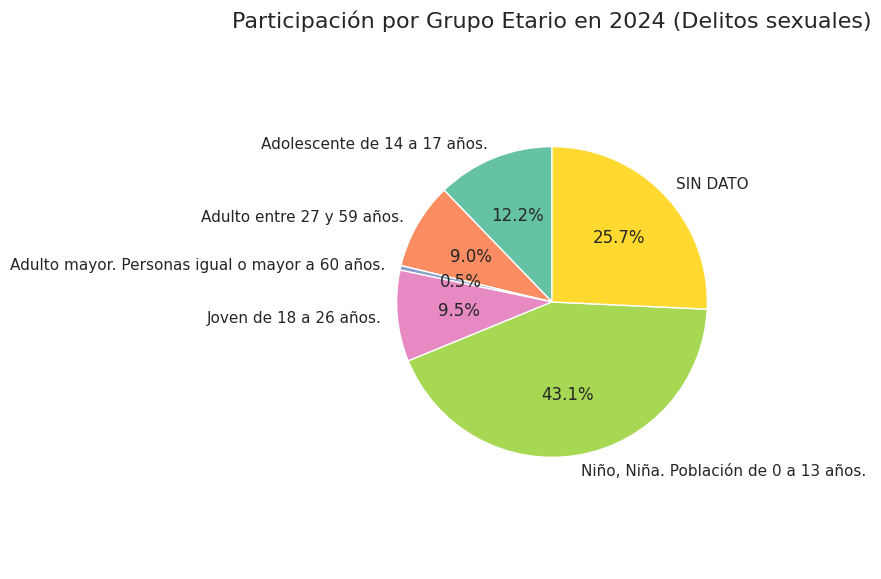

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para el año 2024 y el tipo de delito "DELITOS SEXUALES"
df_2024_delitos_sexuales = df[(df['AÑO_HECHOS'] == 2024) & (df['GRUPO_DELITO'] == 'DELITOS SEXUALES')]

# Agrupar por GRUPO_ETARIO y sumar las víctimas
grupo_etario_2024 = df_2024_delitos_sexuales.groupby('GRUPO_ETARIO')['TOTAL_VÍCTIMAS'].sum()

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(grupo_etario_2024, labels=grupo_etario_2024.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(grupo_etario_2024)))

# Configurar título y mostrar el gráfico
plt.title('Participación por Grupo Etario en 2024 (Delitos sexuales)', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.tight_layout()
plt.show()



Ahora debo hacer el mapa :c, toca unificar las bases de datos

In [ ]:
print(gdf_meta)
print(df)

    DPTOMPIO DPTO_CCDGO MPIO_CCDGO            MPIO_CNMBR MPIO_CCNCT  \
686    50001         50        001         VILLAVICENCIO      50001   
687    50006         50        006               ACACÍAS      50006   
688    50110         50        110      BARRANCA DE UPÍA      50110   
689    50124         50        124              CABUYARO      50124   
690    50150         50        150     CASTILLA LA NUEVA      50150   
691    50223         50        223  SAN LUIS DE CUBARRAL      50223   
692    50226         50        226               CUMARAL      50226   
693    50245         50        245           EL CALVARIO      50245   
694    50251         50        251           EL CASTILLO      50251   
695    50270         50        270             EL DORADO      50270   
696    50287         50        287         FUENTE DE ORO      50287   
697    50313         50        313               GRANADA      50313   
698    50318         50        318                GUAMAL      50318   
699   

In [ ]:
# Filtrar los datos para el año 2024
df_victimas_2024 = df[df['AÑO_HECHOS'] == 2024]

# Agrupar por MUNICIPIO_HECHO y sumar las víctimas
df_resumen_victimas = df_victimas_2024.groupby('MUNICIPIO_HECHO')['TOTAL_VÍCTIMAS'].sum().reset_index()

# Verificar el resultado
print(df_resumen_victimas)


         MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0                ACACÍAS             709
1       BARRANCA DE UPÍA              59
2               CABUYARO              41
3      CASTILLA LA NUEVA              93
4               CUBARRAL              33
5                CUMARAL             213
6            EL CALVARIO               3
7            EL CASTILLO              26
8              EL DORADO              19
9          FUENTE DE ORO              51
10               GRANADA             434
11                GUAMAL             102
12           LA MACARENA             130
13              LEJANÍAS              63
14             MAPIRIPÁN              36
15               MESETAS              53
16      PUERTO CONCORDIA              84
17         PUERTO GAITÁN             229
18         PUERTO LLERAS              43
19          PUERTO LÓPEZ             206
20           PUERTO RICO              70
21              RESTREPO              99
22  SAN CARLOS DE GUAROA             106
23     SAN JUAN 

In [ ]:
# Filtrar solo las filas donde SEXO es "FEMENINO"
df_femenino = df_victimas_2024[df_victimas_2024['SEXO'] == 'FEMENINO']

# Agrupar por municipio y sumar las víctimas
df_resumen_victimas_femenino = df_femenino.groupby('MUNICIPIO_HECHO')['TOTAL_VÍCTIMAS'].sum().reset_index()

# Verificar el resultado
print(df_resumen_victimas_femenino)


         MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0                ACACÍAS             464
1       BARRANCA DE UPÍA              42
2               CABUYARO              28
3      CASTILLA LA NUEVA              58
4               CUBARRAL              18
5                CUMARAL             135
6            EL CALVARIO               2
7            EL CASTILLO              15
8              EL DORADO              13
9          FUENTE DE ORO              33
10               GRANADA             282
11                GUAMAL              63
12           LA MACARENA              63
13              LEJANÍAS              38
14             MAPIRIPÁN              17
15               MESETAS              37
16      PUERTO CONCORDIA              67
17         PUERTO GAITÁN             129
18         PUERTO LLERAS              23
19          PUERTO LÓPEZ             121
20           PUERTO RICO              51
21              RESTREPO              63
22  SAN CARLOS DE GUAROA              62
23     SAN JUAN 

In [ ]:
 # Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_resumen_victimas, left_on='MPIO_CNMBR', right_on='MUNICIPIO_HECHO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())

NameError: name 'gdf_meta' is not defined

In [ ]:
 # Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_resumen_victimas_femenino, left_on='MPIO_CNMBR', right_on='MUNICIPIO_HECHO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())

  DPTOMPIO DPTO_CCDGO MPIO_CCDGO         MPIO_CNMBR MPIO_CCNCT  \
0    50001         50        001      VILLAVICENCIO      50001   
1    50006         50        006            ACACÍAS      50006   
2    50110         50        110   BARRANCA DE UPÍA      50110   
3    50124         50        124           CABUYARO      50124   
4    50150         50        150  CASTILLA LA NUEVA      50150   

                                            geometry  MUNICIPIO_HECHO_x  \
0  POLYGON ((-73.62782 4.2867, -73.62824 4.28672,...      VILLAVICENCIO   
1  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...            ACACÍAS   
2  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...   BARRANCA DE UPÍA   
3  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...           CABUYARO   
4  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  CASTILLA LA NUEVA   

   TOTAL_VÍCTIMAS_x  MUNICIPIO_HECHO_y  TOTAL_VÍCTIMAS_y  
0            4922.0      VILLAVICENCIO            3011.0  
1             709.0            ACA

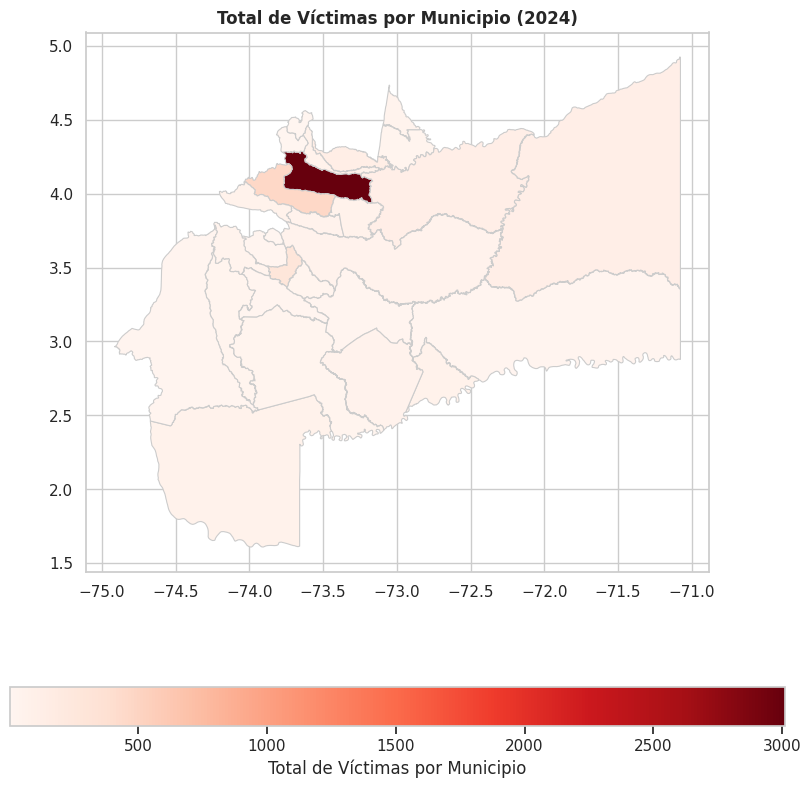

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Crear el mapa con la variable TOTAL_VÍCTIMAS_y
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Hacer el mapa de densidad usando la variable "TOTAL_VÍCTIMAS_y"
gdf_meta.plot(column='TOTAL_VÍCTIMAS_y', ax=ax, legend=True,
              legend_kwds={'label': "Total de Víctimas por Municipio",
                           'orientation': "horizontal"},
              cmap='Reds',  # Mapa de colores en tonos rojos
              linewidth=0.8, edgecolor='0.8', figsize=(10, 10))

# Título del mapa
ax.set_title('Total de Víctimas por Municipio (2024)', fontweight='bold')

# Mostrar el mapa
plt.show()


NameError: name 'gdf_meta' is not defined

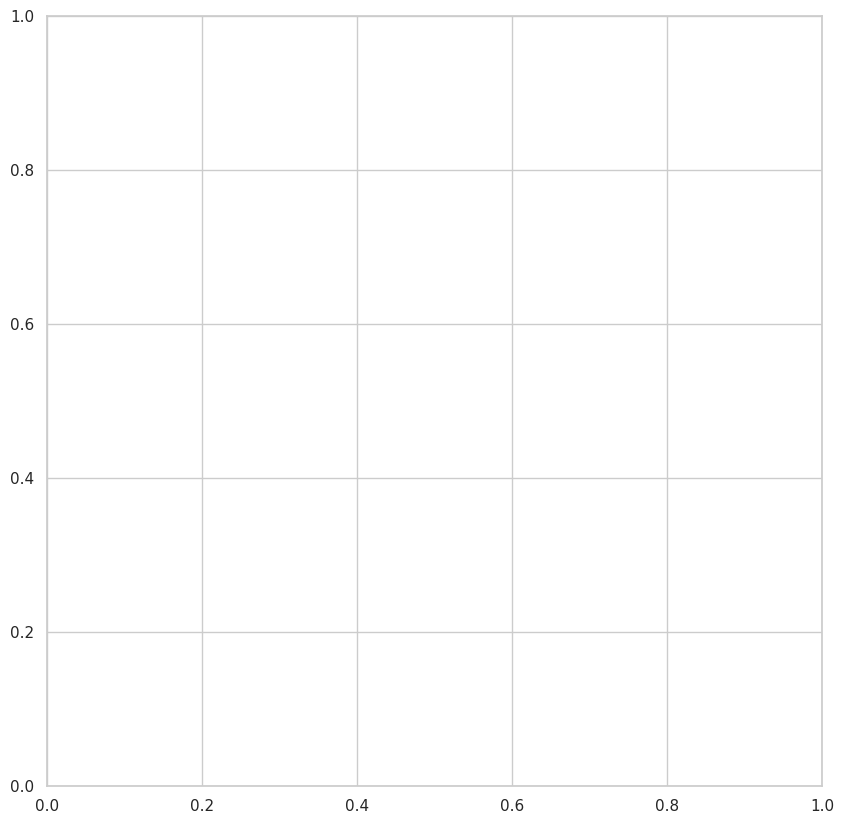

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Crear el mapa con la variable TOTAL_VÍCTIMAS_y
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Hacer el mapa de densidad usando la variable "TOTAL_VÍCTIMAS_y"
gdf_meta.plot(column='TOTAL_VÍCTIMAS_y', ax=ax, legend=True,
              legend_kwds={'label': "Total de mujeres Víctimas por Municipio",
                           'orientation': "horizontal"},
              cmap='YlOrRd',  # Mapa de colores con tonalidades amarillas y rojas
              linewidth=0.8, edgecolor='0.8', figsize=(10, 10))

# Título del mapa
ax.set_title('Total de mujeres Víctimas por Municipio (2024)', fontweight='bold')

# Mostrar el mapa
plt.show()


In [ ]:
# Filtrar los datos para el año 2024
df_victimas_2024 = df[df['AÑO_HECHOS'] == 2024]

# Si quieres ver todos los municipios y sus valores
print("\nTotal de víctimas por municipio en 2024:")
print(df_resumen_victimas)


Municipios con mayor número de víctimas en 2024:
['VILLAVICENCIO' 'ACACÍAS' 'GRANADA']

Total de víctimas por municipio en 2024:
         MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0                ACACÍAS             709
1       BARRANCA DE UPÍA              59
2               CABUYARO              41
3      CASTILLA LA NUEVA              93
4               CUBARRAL              33
5                CUMARAL             213
6            EL CALVARIO               3
7            EL CASTILLO              26
8              EL DORADO              19
9          FUENTE DE ORO              51
10               GRANADA             434
11                GUAMAL             102
12           LA MACARENA             130
13              LEJANÍAS              63
14             MAPIRIPÁN              36
15               MESETAS              53
16      PUERTO CONCORDIA              84
17         PUERTO GAITÁN             229
18         PUERTO LLERAS              43
19          PUERTO LÓPEZ             206
20        

#CREAR GRAFICO DINAMICO

SERIE DE TIEMPO

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os

# Filtrar solo las filas con SEXO = 'FEMENINO'
df_femenino = df[df['SEXO'] == 'FEMENINO']

# Agrupar por año y sumar las víctimas
serie_tiempo = df_femenino.groupby('AÑO_HECHOS')['TOTAL_VÍCTIMAS'].sum()

# Configuración de seaborn
sns.set_theme(style="whitegrid")

# Lista para guardar los archivos temporales
filenames = []

# Crear gráficos por año (más fluido)
for i in range(1, len(serie_tiempo) + 1):
    x_original = serie_tiempo.index[:i]
    y_original = serie_tiempo.values[:i]

    # Aumentamos el tamaño de la figura para hacer espacio en la parte inferior
    plt.figure(figsize=(12, 7))  # Altura aumentada de 6 a 7

    # Resaltar el período 2020-2022
    plt.axvspan(2020, 2022, color='red', alpha=0.3, label='Período 2020-2022')

    # Trazar la línea sin suavizar
    plt.plot(x_original, y_original, color='crimson', linewidth=2.5, label='Total víctimas femeninas')

    # Añadir etiquetas
    for x, y in zip(x_original, y_original):
        plt.text(x, y + 50, f'{int(y)}', ha='center', fontsize=10, color='black')

    # Personalizar gráfico
    plt.title('Total de Mujeres víctimas VBG en el Meta', fontsize=16, fontweight='bold')
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Total de Víctimas', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc='upper left')
    plt.ylim(3000, 6000)
    plt.xlim(2015, 2024)  # Fijamos el rango del eje X de 2015 a 2024
    plt.grid(visible=True, linestyle='--', alpha=0.7)

    # Añadir la nota al pie
    plt.figtext(0.5, -0.05, "Fuente: Nelson Mantilla con datos de la Fiscalía General de la Nación", ha="center", va="center", fontsize=10, color='black')

    # Guardar frame temporal
    filename = f'frame_{i}.png'
    plt.savefig(filename, bbox_inches='tight')  # Usamos bbox_inches='tight' para evitar cortar la parte inferior
    filenames.append(filename)
    plt.close()

# Crear GIF con bucle infinito y ajustar la duración a 0.2 segundos por frame para mayor fluidez
with imageio.get_writer('evolucion_victimas.gif', mode='I', duration=500, loop=0) as writer:  # Duración más corta para mayor fluidez
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpiar archivos temporales
for filename in filenames:
    os.remove(filename)

print("GIF creado: evolucion_victimas.gif")


<ipython-input-7-af7b457b10a9>:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF creado: evolucion_victimas.gif


POR MUNICIPIO (SIN VILLAVICENCIO)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os

# Filtrar solo las filas con SEXO = 'FEMENINO' y excluir 'VILLAVICENCIO'
df_femenino = df[df['SEXO'] == 'FEMENINO']
df_femenino = df_femenino[df_femenino['MUNICIPIO_HECHO'] != 'VILLAVICENCIO']

# Agrupar por año, municipio y sumar las víctimas
acumulado_por_municipio = df_femenino.groupby(['AÑO_HECHOS', 'MUNICIPIO_HECHO'])['TOTAL_VÍCTIMAS'].sum().unstack()

# Configuración de seaborn
sns.set_theme(style="darkgrid")  # Estilo moderno con fondo gris

# Lista para guardar los archivos temporales
filenames = []

# Obtener el valor máximo para el eje Y
max_value = acumulado_por_municipio.sum(axis=0).max() + 500  # Ajustar +500 para un poco de margen

# Crear gráficos por año (sin interpolaciones, solo valores reales)
for i in range(1, len(acumulado_por_municipio) + 1):
    # Obtener los datos de acumulado hasta el año i
    acumulado_año_i = acumulado_por_municipio.iloc[:i].sum(axis=0)

    # Ordenar los municipios de mayor a menor
    acumulado_año_i = acumulado_año_i.sort_values(ascending=False)

    # Crear gráfico de barras
    plt.figure(figsize=(12, 7))

    # Graficar las barras con tonos rosados
    sns.barplot(x=acumulado_año_i.index, y=acumulado_año_i.values, palette="viridis")  # Paleta de tonos rosados

    # Personalizar gráfico
    plt.title('Acumulado últimos 10 años de mujeres víctimas\n de VBG por municipio (sin Villavicencio)',
              fontsize=18, fontweight='bold', color='black', pad=20)  # Título dividido en dos filas y mayor espacio
    plt.xlabel('Municipio', fontsize=14, color='black')
    plt.ylabel('Total de Víctimas', fontsize=14, color='black')
    plt.xticks(rotation=90, fontsize=12, color='black')  # Girar etiquetas del eje X para que se vean bien
    plt.yticks(fontsize=12, color='black')

    # Fijar el límite del eje Y
    plt.ylim(0, max_value)  # Usar el valor máximo para el eje Y

    # Eliminar la cuadrícula
    plt.grid(False)

    # Añadir la nota al pie
    plt.figtext(0.5, -0.30, "Fuente: Nelson Mantilla con datos de la Fiscalía General de la Nación", ha="center", va="center", fontsize=10, color='black')

    # Obtener el año actual
    anio_actual = acumulado_por_municipio.index[i - 1]

    # Añadir el año como texto en el panel superior izquierdo (como una leyenda)
    plt.text(0.05, 0.95, f'Año: {anio_actual}', ha='left', va='center', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes)

    # Guardar frame temporal
    filename = f'frame_{i}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Usamos bbox_inches='tight' para evitar cortar la parte inferior
    filenames.append(filename)
    plt.close()

# Crear GIF con bucle infinito y ajustar la duración
with imageio.get_writer('evolucion_victimas_municipio_sin_villavicencio.gif', mode='I', duration=300, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpiar archivos temporales
for filename in filenames:
    os.remove(filename)

print("GIF creado: evolucion_victimas_municipio_sin_villavicencio.gif")



<ipython-input-87-1b3017149678>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acumulado_año_i.index, y=acumulado_año_i.values, palette="viridis")  # Paleta de tonos rosados
<ipython-input-87-1b3017149678>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acumulado_año_i.index, y=acumulado_año_i.values, palette="viridis")  # Paleta de tonos rosados
<ipython-input-87-1b3017149678>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acumulado_año_i.index, y=acumulado_año_i.values, palette="viridis")  # Paleta de tonos rosados
<ipython-i

GIF creado: evolucion_victimas_municipio_sin_villavicencio.gif


# GRAFICO DE MAPA DINAMICO

PRIMERO CARGAR DATOS DE POBLACION

In [ ]:
import gdown

# Reemplaza 'FILE_ID' con el ID del archivo
file_id = '1YiLea4593lfHmY3ZUZKlR1fT06WFawkx'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo CSV
gdown.download(url, 'archivo.xlsx', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1YiLea4593lfHmY3ZUZKlR1fT06WFawkx
To: /content/archivo.xlsx
100%|██████████| 14.0k/14.0k [00:00<00:00, 21.4MB/s]


'archivo.xlsx'

In [ ]:
import pandas as pd

# Leer el archivo CSV descargado
df_poblacion = pd.read_excel('archivo.xlsx')

# Mostrar las primeras filas
print(df_poblacion)

              DPMP   AÑO  Total Mujeres
0    Villavicencio  2015         253209
1    Villavicencio  2016         258297
2    Villavicencio  2017         263317
3    Villavicencio  2018         268991
4    Villavicencio  2019         272752
..             ...   ...            ...
285   Vistahermosa  2020           8613
286   Vistahermosa  2021           8740
287   Vistahermosa  2022           8888
288   Vistahermosa  2023           9069
289   Vistahermosa  2024           9212

[290 rows x 3 columns]


In [ ]:
df_poblacion['DPMP'] = df_poblacion['DPMP'].str.upper()

print(df_poblacion ['DPMP'])

0      VILLAVICENCIO
1      VILLAVICENCIO
2      VILLAVICENCIO
3      VILLAVICENCIO
4      VILLAVICENCIO
           ...      
285     VISTAHERMOSA
286     VISTAHERMOSA
287     VISTAHERMOSA
288     VISTAHERMOSA
289     VISTAHERMOSA
Name: DPMP, Length: 290, dtype: object


In [ ]:
# Asegurarte de que ambas columnas estén en mayúsculas y sin espacios adicionales
df_poblacion['DPMP'] = df_poblacion['DPMP'].str.upper().str.strip()
df['MUNICIPIO_HECHO'] = df['MUNICIPIO_HECHO'].str.upper().str.strip()

In [ ]:
municipios_poblacion = set(df_poblacion['DPMP'])
municipios_hecho = set(df['MUNICIPIO_HECHO'])

In [ ]:
municipios_comunes = municipios_poblacion.intersection(municipios_hecho)
print(municipios_comunes)

{'SAN JUANITO', 'ACACÍAS', 'CASTILLA LA NUEVA', 'EL CASTILLO', 'BARRANCA DE UPÍA', 'CUMARAL', 'PUERTO GAITÁN', 'PUERTO CONCORDIA', 'VISTAHERMOSA', 'EL DORADO', 'MESETAS', 'SAN JUAN DE ARAMA', 'GUAMAL', 'EL CALVARIO', 'MAPIRIPÁN', 'PUERTO LLERAS', 'CUBARRAL', 'CABUYARO', 'LA MACARENA', 'PUERTO LÓPEZ', 'GRANADA', 'URIBE', 'FUENTE DE ORO', 'VILLAVICENCIO', 'SAN CARLOS DE GUAROA', 'SAN MARTÍN', 'LEJANÍAS', 'RESTREPO', 'PUERTO RICO'}


In [ ]:
len(municipios_comunes)

29

COMBINEMOS LAS BASES DE DATOS


In [ ]:
print(df)

      CRIMINALIDAD ES_ARCHIVO ES_PRECLUSIÓN    ESTADO          ETAPA_CASO  \
0               SI         NO            NO  INACTIVO  EJECUCIÓN DE PENAS   
1               SI         NO            NO    ACTIVO          INDAGACIÓN   
2               NO         SI            NO  INACTIVO          INDAGACIÓN   
3               SI         NO            NO    ACTIVO          INDAGACIÓN   
4               SI         NO            NO  INACTIVO  EJECUCIÓN DE PENAS   
...            ...        ...           ...       ...                 ...   
28105           SI         NO            NO    ACTIVO              JUICIO   
28106           SI         SI            NO  INACTIVO          INDAGACIÓN   
28107           SI         SI            NO  INACTIVO          INDAGACIÓN   
28108           NO         SI            NO  INACTIVO          INDAGACIÓN   
28109           SI         NO            NO  INACTIVO          INDAGACIÓN   

            LEY PAÍS_HECHO DEPARTAMENTO_HECHO       MUNICIPIO_HECHO  \
0   

In [ ]:
# Filtrar solo los registros donde el SEXO sea FEMENINO
df_femenino = df[df['SEXO'] == 'FEMENINO']

# Agrupar por AÑO_HECHOS y MUNICIPIO_HECHO y sumar TOTAL_VÍCTIMAS
df_agrupado = df_femenino.groupby(['AÑO_HECHOS', 'MUNICIPIO_HECHO'], as_index=False)['TOTAL_VÍCTIMAS'].sum()

# Crear un diccionario para almacenar las bases de datos por cada año
bases_por_año = {}

for año in df_agrupado['AÑO_HECHOS'].unique():
    # Filtrar los datos para el año actual
    base_año = df_agrupado[df_agrupado['AÑO_HECHOS'] == año]
    # Guardar en el diccionario
    bases_por_año[año] = base_año

    # Si deseas guardar los resultados como archivos CSV, puedes usar esto:
    # base_año.to_csv(f"base_femenino_{año}.csv", index=False)

# Mostrar un ejemplo de las bases creadas
for año, base in bases_por_año.items():
    print(f"Base de datos para el año {año}:")
    print(base.head())  # Muestra las primeras filas de la base para ese año


Base de datos para el año 2015:
   AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0        2015            ACACÍAS             344
1        2015   BARRANCA DE UPÍA              27
2        2015           CABUYARO              17
3        2015  CASTILLA LA NUEVA              24
4        2015           CUBARRAL              23
Base de datos para el año 2016:
    AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
29        2016            ACACÍAS             292
30        2016   BARRANCA DE UPÍA              26
31        2016           CABUYARO              20
32        2016  CASTILLA LA NUEVA              24
33        2016           CUBARRAL              16
Base de datos para el año 2017:
    AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
58        2017            ACACÍAS             332
59        2017   BARRANCA DE UPÍA              29
60        2017           CABUYARO              18
61        2017  CASTILLA LA NUEVA              21
62        2017           CUBARRAL              17
Base de da

In [ ]:
# Agrupar por AÑO y DPMP y sumar la columna Total Mujeres
df_poblacion_agrupado = df_poblacion.groupby(['AÑO', 'DPMP'], as_index=False)['Total Mujeres'].sum()

# Crear un diccionario para almacenar las bases de datos por cada año
bases_por_año_poblacion = {}

for año in df_poblacion_agrupado['AÑO'].unique():
    # Filtrar los datos para el año actual
    base_año = df_poblacion_agrupado[df_poblacion_agrupado['AÑO'] == año]
    # Guardar en el diccionario
    bases_por_año_poblacion[año] = base_año

    # Si deseas guardar los resultados como archivos CSV, puedes usar esto:
    # base_año.to_csv(f"base_poblacion_{año}.csv", index=False)

# Mostrar un ejemplo de las bases creadas
for año, base in bases_por_año_poblacion.items():
    print(f"Base de datos para el año {año}:")
    print(base.head())  # Muestra las primeras filas de la base para ese año


Base de datos para el año 2015:
    AÑO               DPMP  Total Mujeres
0  2015            ACACÍAS          39586
1  2015   BARRANCA DE UPÍA           2925
2  2015           CABUYARO           2555
3  2015  CASTILLA LA NUEVA           6382
4  2015           CUBARRAL           3263
Base de datos para el año 2016:
     AÑO               DPMP  Total Mujeres
29  2016            ACACÍAS          40512
30  2016   BARRANCA DE UPÍA           2991
31  2016           CABUYARO           2607
32  2016  CASTILLA LA NUEVA           6522
33  2016           CUBARRAL           3319
Base de datos para el año 2017:
     AÑO               DPMP  Total Mujeres
58  2017            ACACÍAS          41352
59  2017   BARRANCA DE UPÍA           3092
60  2017           CABUYARO           2658
61  2017  CASTILLA LA NUEVA           6709
62  2017           CUBARRAL           3372
Base de datos para el año 2018:
     AÑO               DPMP  Total Mujeres
87  2018            ACACÍAS          42206
88  2018   BARRANC

In [ ]:
# Crear un diccionario para almacenar las bases combinadas por año
bases_combinadas = {}

# Recorrer los años disponibles en ambas bases
for año in bases_por_año.keys():  # Iteramos sobre los años de las víctimas
    if año in bases_por_año_poblacion:  # Verificamos que también existan datos de población para ese año
        # Obtener las bases de víctimas y población para el año actual
        base_victimas = bases_por_año[año]
        base_poblacion = bases_por_año_poblacion[año]

        # Asegurarse de que las columnas de municipios tienen el mismo formato
        base_victimas['MUNICIPIO_HECHO'] = base_victimas['MUNICIPIO_HECHO'].str.strip().str.upper()
        base_poblacion['DPMP'] = base_poblacion['DPMP'].str.strip().str.upper()

        # Realizar la unión (merge) por el municipio y el año
        base_combinada = pd.merge(
            base_victimas,
            base_poblacion,
            left_on=['AÑO_HECHOS', 'MUNICIPIO_HECHO'],
            right_on=['AÑO', 'DPMP'],
            how='inner'  # Usamos inner para quedarnos solo con coincidencias
        )

        # Guardar la base combinada en el diccionario
        bases_combinadas[año] = base_combinada

        # Si deseas exportar las bases combinadas como archivos CSV
        # base_combinada.to_csv(f"base_combinada_{año}.csv", index=False)

# Mostrar un ejemplo de las bases combinadas
for año, base in bases_combinadas.items():
    print(f"Base combinada para el año {año}:")
    print(base.head())  # Muestra las primeras filas de la base combinada para ese año


Base combinada para el año 2015:
   AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS   AÑO               DPMP  \
0        2015            ACACÍAS             344  2015            ACACÍAS   
1        2015   BARRANCA DE UPÍA              27  2015   BARRANCA DE UPÍA   
2        2015           CABUYARO              17  2015           CABUYARO   
3        2015  CASTILLA LA NUEVA              24  2015  CASTILLA LA NUEVA   
4        2015           CUBARRAL              23  2015           CUBARRAL   

   Total Mujeres  
0          39586  
1           2925  
2           2555  
3           6382  
4           3263  
Base combinada para el año 2016:
   AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS   AÑO               DPMP  \
0        2016            ACACÍAS             292  2016            ACACÍAS   
1        2016   BARRANCA DE UPÍA              26  2016   BARRANCA DE UPÍA   
2        2016           CABUYARO              20  2016           CABUYARO   
3        2016  CASTILLA LA NUEVA              24 

<ipython-input-14-1343ee05d0fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_victimas['MUNICIPIO_HECHO'] = base_victimas['MUNICIPIO_HECHO'].str.strip().str.upper()
<ipython-input-14-1343ee05d0fd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_poblacion['DPMP'] = base_poblacion['DPMP'].str.strip().str.upper()
<ipython-input-14-1343ee05d0fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


CREAR TASA X 1000 MUJERES

In [ ]:
# Iterar sobre las bases combinadas para calcular la tasa
for año, base in bases_combinadas.items():
    # Crear la nueva columna 'tasa'
    base['tasa'] = (base['TOTAL_VÍCTIMAS'] / base['Total Mujeres']) * 1000

    # Redondear la tasa a 2 decimales para mayor claridad
    base['tasa'] = base['tasa'].round(2)

    # Actualizar la base combinada en el diccionario
    bases_combinadas[año] = base

# Mostrar un ejemplo con la nueva variable 'tasa'
for año, base in bases_combinadas.items():
    print(f"Base combinada para el año {año} con la nueva columna 'tasa':")
    print(base[['AÑO_HECHOS', 'MUNICIPIO_HECHO', 'TOTAL_VÍCTIMAS', 'Total Mujeres', 'tasa']].head())


Base combinada para el año 2015 con la nueva columna 'tasa':
   AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS  Total Mujeres  tasa
0        2015            ACACÍAS             344          39586  8.69
1        2015   BARRANCA DE UPÍA              27           2925  9.23
2        2015           CABUYARO              17           2555  6.65
3        2015  CASTILLA LA NUEVA              24           6382  3.76
4        2015           CUBARRAL              23           3263  7.05
Base combinada para el año 2016 con la nueva columna 'tasa':
   AÑO_HECHOS    MUNICIPIO_HECHO  TOTAL_VÍCTIMAS  Total Mujeres  tasa
0        2016            ACACÍAS             292          40512  7.21
1        2016   BARRANCA DE UPÍA              26           2991  8.69
2        2016           CABUYARO              20           2607  7.67
3        2016  CASTILLA LA NUEVA              24           6522  3.68
4        2016           CUBARRAL              16           3319  4.82
Base combinada para el año 2017 con la

In [ ]:
# Obtener los municipios de la base geográfica
municipios_gdf = gdf_meta['MPIO_CNMBR'].unique()

# Crear un diccionario para almacenar los municipios por año en bases_combinadas
municipios_comb_dict = {}

# Extraer los municipios de cada base combinada por año
for año, base in bases_combinadas.items():
    municipios_comb_dict[año] = base['MUNICIPIO_HECHO'].unique()

# Comparar los municipios entre ambas bases
for año, municipios_comb in municipios_comb_dict.items():
    municipios_gdf_set = set(municipios_gdf)  # Convertir los municipios de gdf_meta en un set para la comparación
    municipios_comb_set = set(municipios_comb)  # Convertir los municipios de bases_combinadas en un set

    municipios_comunes = municipios_gdf_set.intersection(municipios_comb_set)
    municipios_gdf_unicos = municipios_gdf_set - municipios_comb_set
    municipios_comb_unicos = municipios_comb_set - municipios_gdf_set

    # Imprimir los resultados
    print(f"\nAño: {año}")
    print(f"Municipios comunes: {municipios_comunes}")
    print(f"Municipios solo en gdf_meta: {municipios_gdf_unicos}")
    print(f"Municipios solo en bases_combinadas: {municipios_comb_unicos}")



Año: 2015
Municipios comunes: {'SAN JUANITO', 'ACACÍAS', 'CASTILLA LA NUEVA', 'EL CASTILLO', 'BARRANCA DE UPÍA', 'CUMARAL', 'PUERTO GAITÁN', 'PUERTO CONCORDIA', 'VISTAHERMOSA', 'EL DORADO', 'MESETAS', 'SAN JUAN DE ARAMA', 'GUAMAL', 'EL CALVARIO', 'MAPIRIPÁN', 'PUERTO LLERAS', 'CABUYARO', 'LA MACARENA', 'PUERTO LÓPEZ', 'GRANADA', 'URIBE', 'FUENTE DE ORO', 'SAN CARLOS DE GUAROA', 'VILLAVICENCIO', 'SAN MARTÍN', 'LEJANÍAS', 'RESTREPO', 'PUERTO RICO'}
Municipios solo en gdf_meta: {'SAN LUIS DE CUBARRAL'}
Municipios solo en bases_combinadas: {'CUBARRAL'}

Año: 2016
Municipios comunes: {'SAN JUANITO', 'ACACÍAS', 'CASTILLA LA NUEVA', 'EL CASTILLO', 'BARRANCA DE UPÍA', 'CUMARAL', 'PUERTO GAITÁN', 'PUERTO CONCORDIA', 'VISTAHERMOSA', 'EL DORADO', 'MESETAS', 'SAN JUAN DE ARAMA', 'GUAMAL', 'EL CALVARIO', 'MAPIRIPÁN', 'PUERTO LLERAS', 'CABUYARO', 'LA MACARENA', 'PUERTO LÓPEZ', 'GRANADA', 'URIBE', 'FUENTE DE ORO', 'SAN CARLOS DE GUAROA', 'VILLAVICENCIO', 'SAN MARTÍN', 'LEJANÍAS', 'RESTREPO', 'PUERTO

In [ ]:
# Iterar sobre las bases combinadas para ajustar el nombre de municipio
for año, base in bases_combinadas.items():
    # Reemplazar 'CUBARRAL' por 'SAN LUIS DE CUBARRAL'
    base['MUNICIPIO_HECHO'] = base['MUNICIPIO_HECHO'].replace('CUBARRAL', 'SAN LUIS DE CUBARRAL')

    # Actualizar la base combinada en el diccionario
    bases_combinadas[año] = base

# Verificar que el cambio se ha realizado
for año, base in bases_combinadas.items():
    print(f"\nAño: {año}")
    print(base['MUNICIPIO_HECHO'].unique())  # Mostrar los municipios únicos después del cambio



Año: 2015
['ACACÍAS' 'BARRANCA DE UPÍA' 'CABUYARO' 'CASTILLA LA NUEVA'
 'SAN LUIS DE CUBARRAL' 'CUMARAL' 'EL CALVARIO' 'EL CASTILLO' 'EL DORADO'
 'FUENTE DE ORO' 'GRANADA' 'GUAMAL' 'LA MACARENA' 'LEJANÍAS' 'MAPIRIPÁN'
 'MESETAS' 'PUERTO CONCORDIA' 'PUERTO GAITÁN' 'PUERTO LLERAS'
 'PUERTO LÓPEZ' 'PUERTO RICO' 'RESTREPO' 'SAN CARLOS DE GUAROA'
 'SAN JUAN DE ARAMA' 'SAN JUANITO' 'SAN MARTÍN' 'URIBE' 'VILLAVICENCIO'
 'VISTAHERMOSA']

Año: 2016
['ACACÍAS' 'BARRANCA DE UPÍA' 'CABUYARO' 'CASTILLA LA NUEVA'
 'SAN LUIS DE CUBARRAL' 'CUMARAL' 'EL CALVARIO' 'EL CASTILLO' 'EL DORADO'
 'FUENTE DE ORO' 'GRANADA' 'GUAMAL' 'LA MACARENA' 'LEJANÍAS' 'MAPIRIPÁN'
 'MESETAS' 'PUERTO CONCORDIA' 'PUERTO GAITÁN' 'PUERTO LLERAS'
 'PUERTO LÓPEZ' 'PUERTO RICO' 'RESTREPO' 'SAN CARLOS DE GUAROA'
 'SAN JUAN DE ARAMA' 'SAN JUANITO' 'SAN MARTÍN' 'URIBE' 'VILLAVICENCIO'
 'VISTAHERMOSA']

Año: 2017
['ACACÍAS' 'BARRANCA DE UPÍA' 'CABUYARO' 'CASTILLA LA NUEVA'
 'SAN LUIS DE CUBARRAL' 'CUMARAL' 'EL CALVARIO' 'EL CASTILLO

In [ ]:
# Crear un diccionario para almacenar las bases combinadas con la información geográfica
bases_combinadas_geo = {}

# Iterar sobre los años y las bases de datos
for año, base in bases_combinadas.items():
    # Unir las bases de datos por municipio, usando 'MUNICIPIO_HECHO' y 'MPIO_CNMBR' respectivamente
    base_comb = base.merge(gdf_meta[['MPIO_CNMBR', 'geometry']], left_on='MUNICIPIO_HECHO', right_on='MPIO_CNMBR', how='left')

    # Añadir la base combinada al diccionario
    bases_combinadas_geo[año] = base_comb

    # Verificar los primeros registros
    print(f"\nBase combinada para el año {año} con la información geográfica:")
    print(base_comb[['AÑO_HECHOS', 'MUNICIPIO_HECHO', 'tasa', 'geometry']].head())

# La nueva base con geometría está lista



Base combinada para el año 2015 con la información geográfica:
   AÑO_HECHOS       MUNICIPIO_HECHO  tasa  \
0        2015               ACACÍAS  8.69   
1        2015      BARRANCA DE UPÍA  9.23   
2        2015              CABUYARO  6.65   
3        2015     CASTILLA LA NUEVA  3.76   
4        2015  SAN LUIS DE CUBARRAL  7.05   

                                            geometry  
0  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...  
1  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...  
2  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...  
3  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  
4  POLYGON ((-74.20289 4.01419, -74.20297 4.01423...  

Base combinada para el año 2016 con la información geográfica:
   AÑO_HECHOS       MUNICIPIO_HECHO  tasa  \
0        2016               ACACÍAS  7.21   
1        2016      BARRANCA DE UPÍA  8.69   
2        2016              CABUYARO  7.67   
3        2016     CASTILLA LA NUEVA  3.68   
4        2016  SAN LUIS DE CUBARRAL  4.82   



# MAPA DINAMICO POR AÑO

In [ ]:
import pandas as pd

# Crear una lista vacía para almacenar los DataFrames por año
dataframes_por_año = []

# Iterar sobre los años y extraer la tasa por municipio
for año, df in bases_combinadas_geo.items():
    # Crear un DataFrame solo con los datos necesarios para ese año
    df_año = df[['MPIO_CNMBR', 'tasa']].copy()  # Ajustado para usar 'MPIO_CNMBR' como identificador del municipio
    df_año['año'] = año  # Agregar la columna del año

    # Añadir el DataFrame de este año a la lista
    dataframes_por_año.append(df_año[['MPIO_CNMBR', 'tasa', 'año']])

# Combinar todos los DataFrames de los años en uno solo
df_comb = pd.concat(dataframes_por_año, ignore_index=True)

# Pivotar el DataFrame para que cada año sea una columna
df_pivot = df_comb.pivot(index='MPIO_CNMBR', columns='año', values='tasa')

# Renombrar las columnas para que estén como 'tasa_año'
df_pivot.columns = [f'tasa_{col}' for col in df_pivot.columns]

# Resetear el índice si necesitas un DataFrame plano (opcional)
df_pivot = df_pivot.reset_index()

# Mostrar los primeros registros del DataFrame resultante
print(df_pivot.head())

# Si deseas guardar esta base de datos en un archivo CSV
df_pivot.to_csv('tasas_por_municipio_2015_2024.csv', index=False)


          MPIO_CNMBR  tasa_2015  tasa_2016  tasa_2017  tasa_2018  tasa_2019  \
0            ACACÍAS       8.69       7.21       8.03       9.10       8.51   
1   BARRANCA DE UPÍA       9.23       8.69       9.38      10.07       5.25   
2           CABUYARO       6.65       7.67       6.77      12.91       6.55   
3  CASTILLA LA NUEVA       3.76       3.68       3.13       2.61       8.03   
4            CUMARAL       5.15       5.68       5.66       8.12       5.79   

   tasa_2020  tasa_2021  tasa_2022  tasa_2023  tasa_2024  
0       7.99      11.47      13.06      11.11       9.93  
1       4.44      15.36      11.36       9.21      11.50  
2       5.66      11.12      13.32      13.16       9.32  
3       7.16       5.67       4.78       7.81       7.43  
4       4.68       6.91       6.81       6.85      10.58  


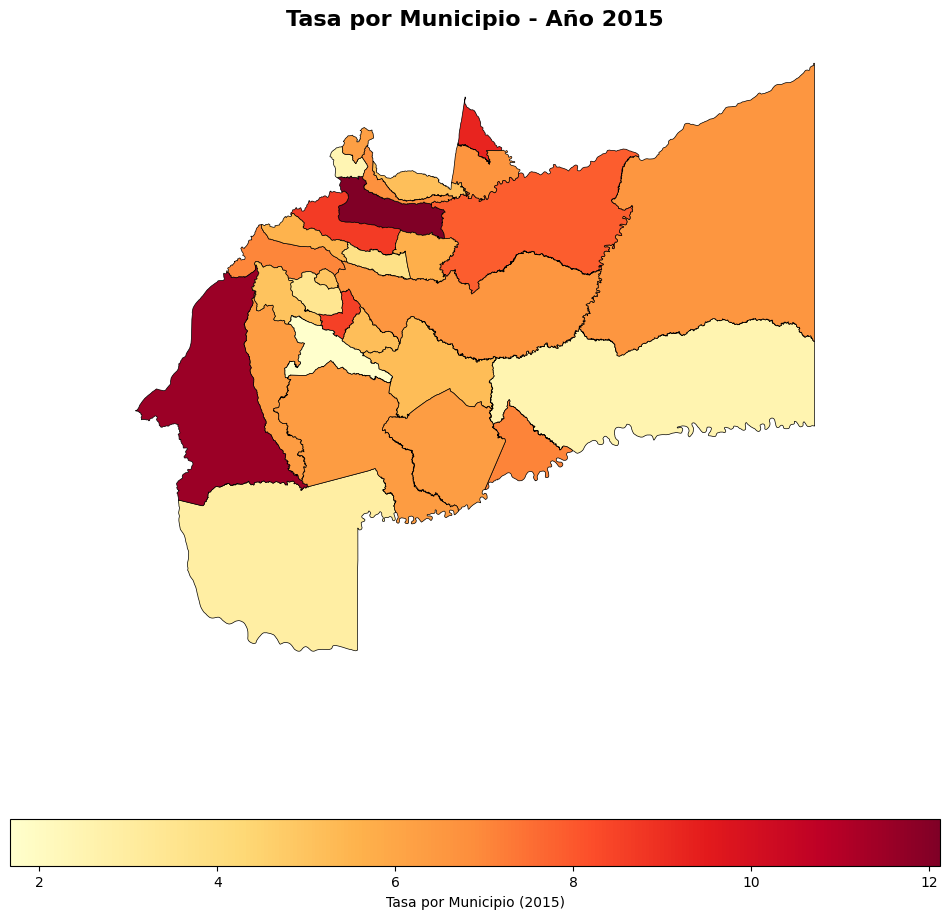

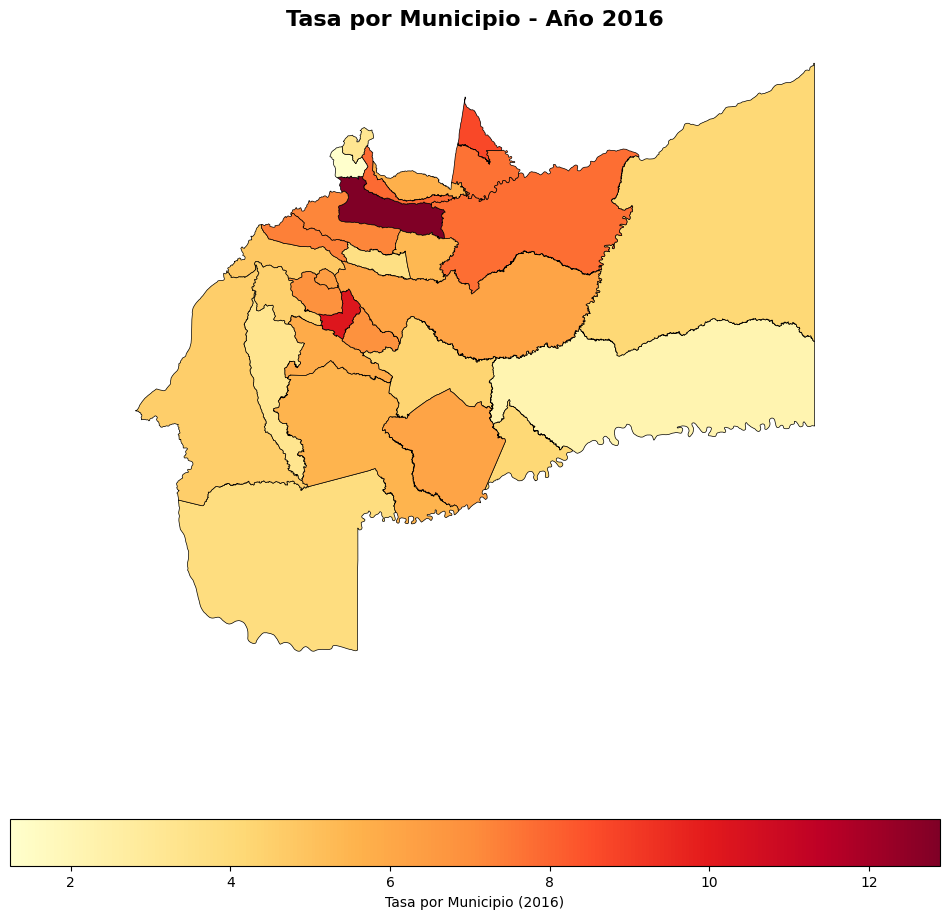

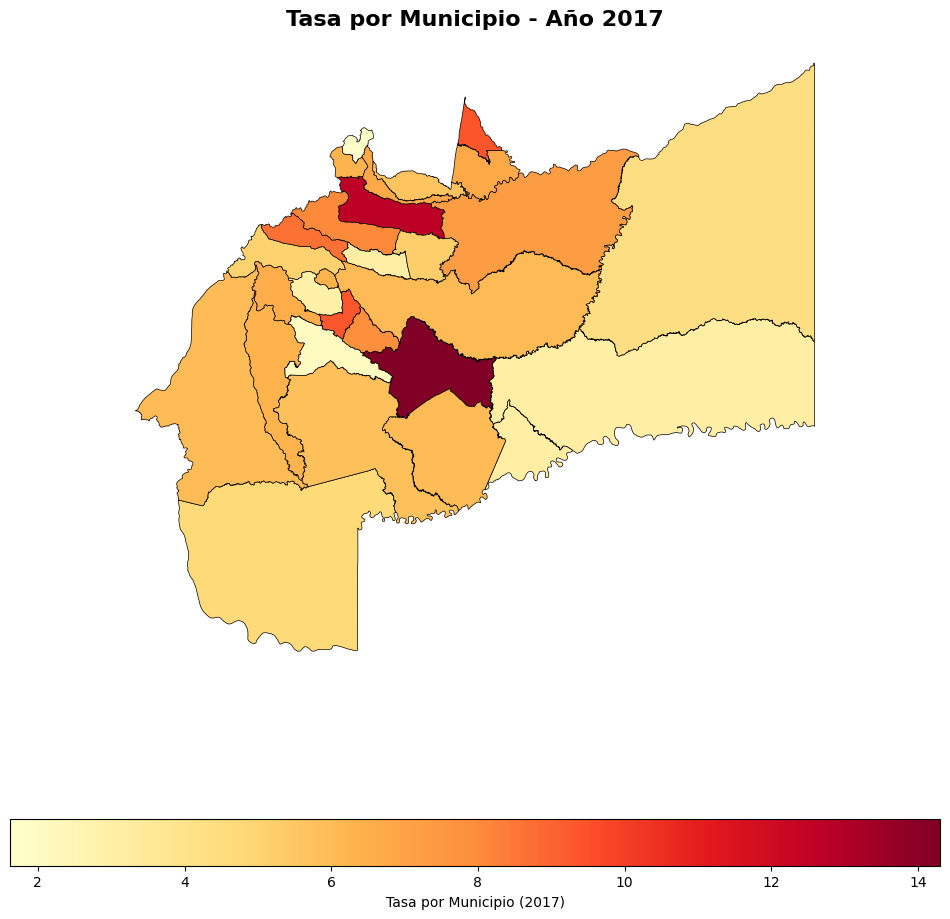

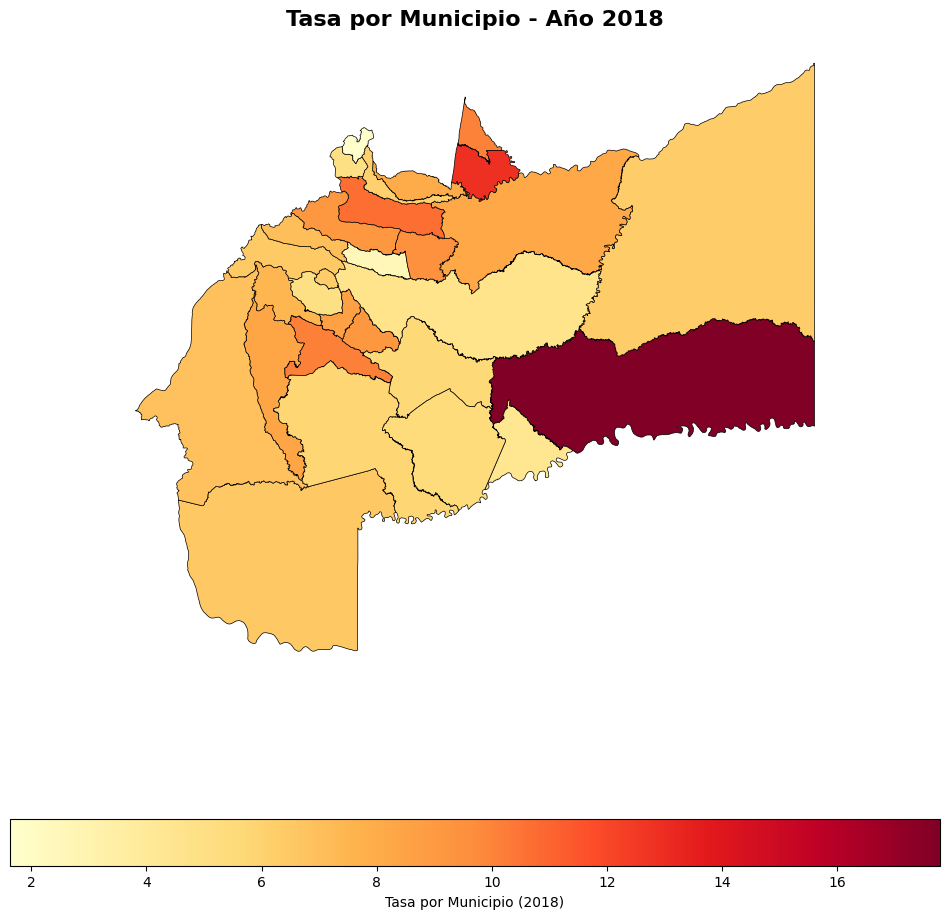

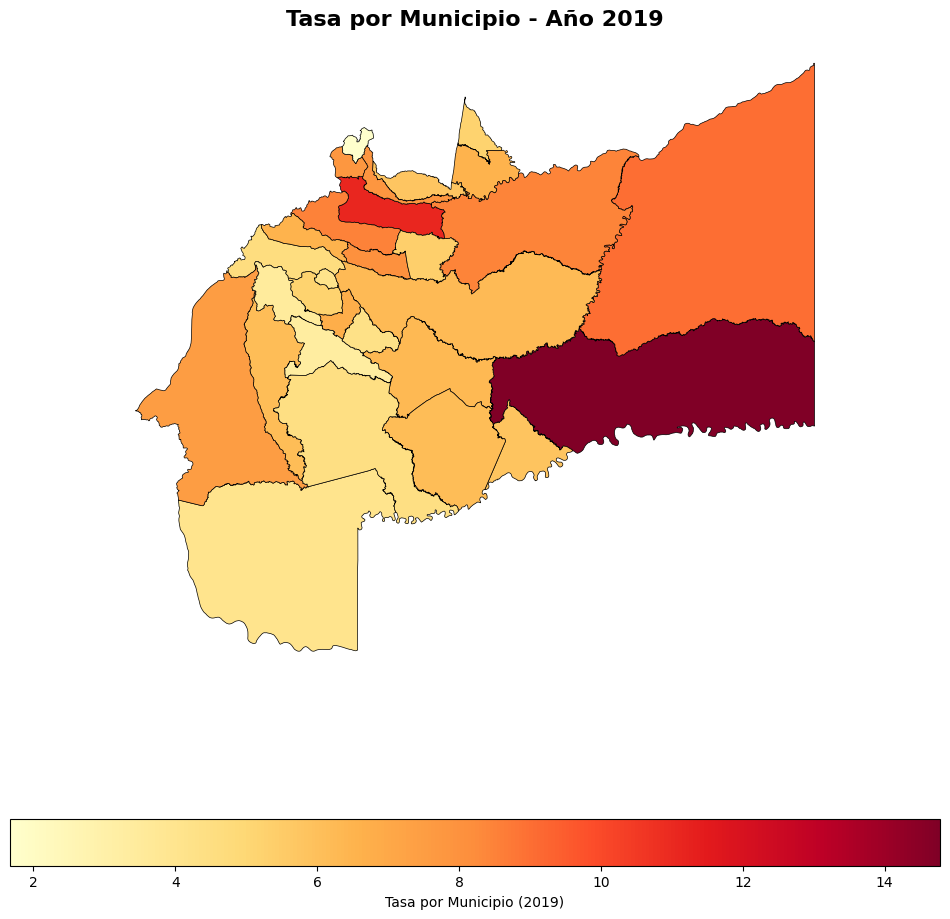

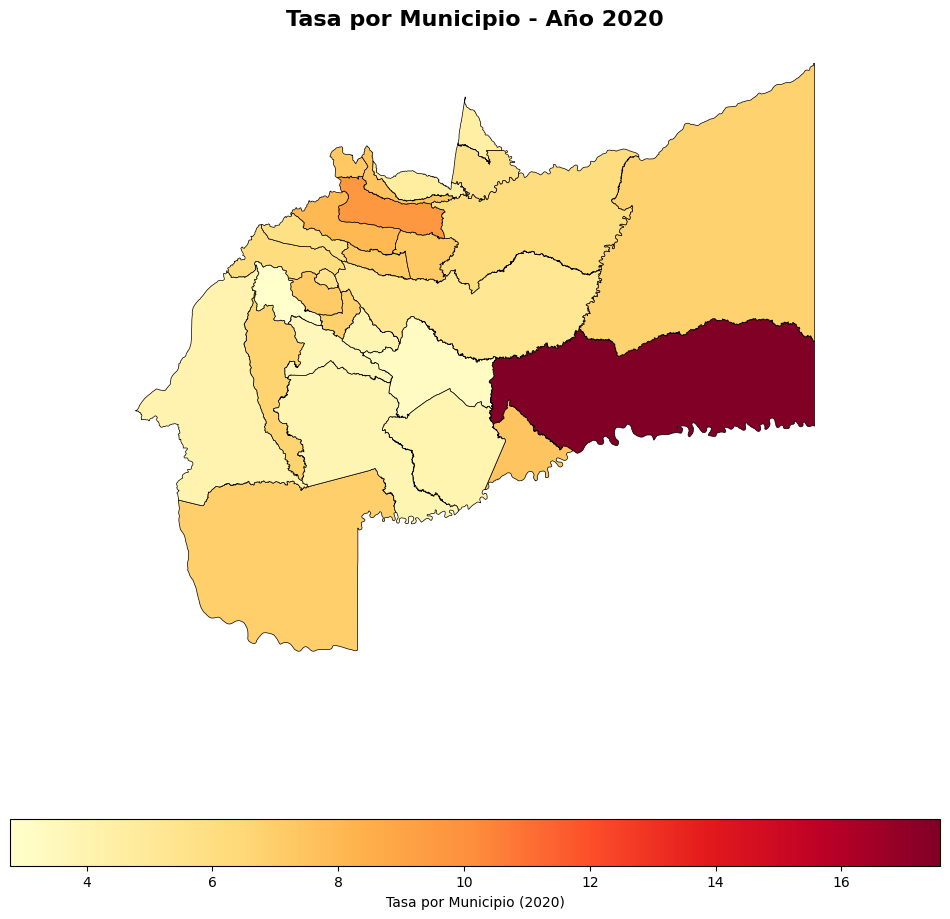

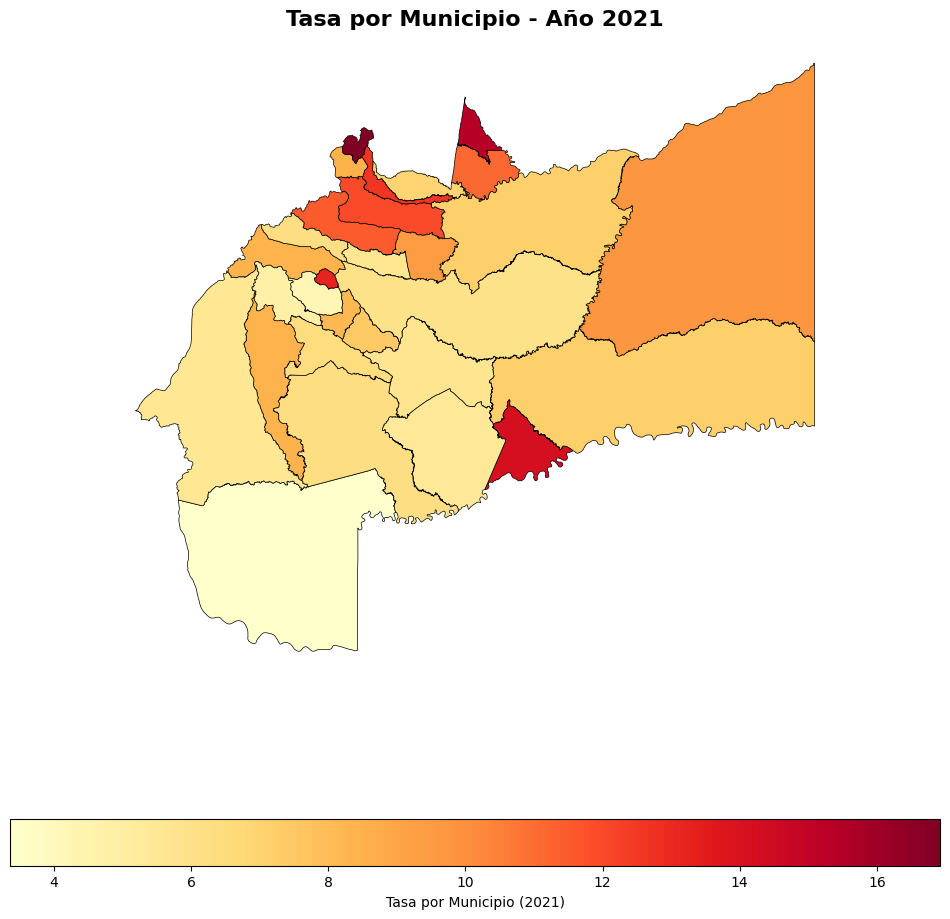

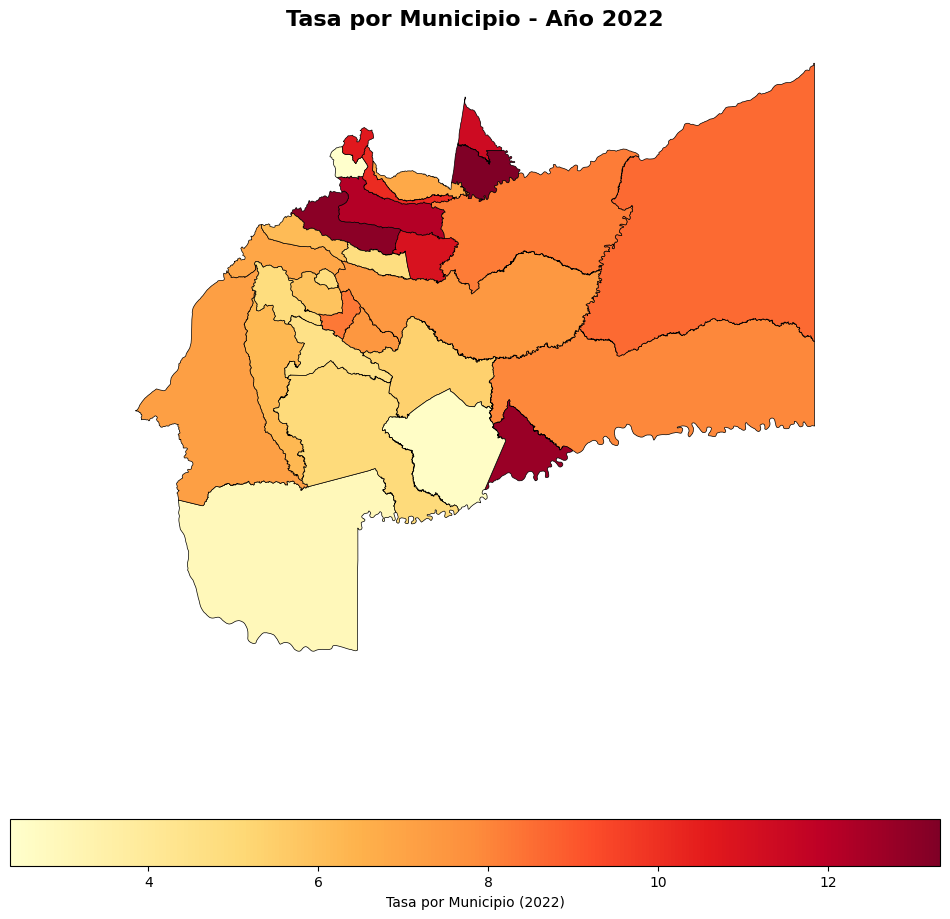

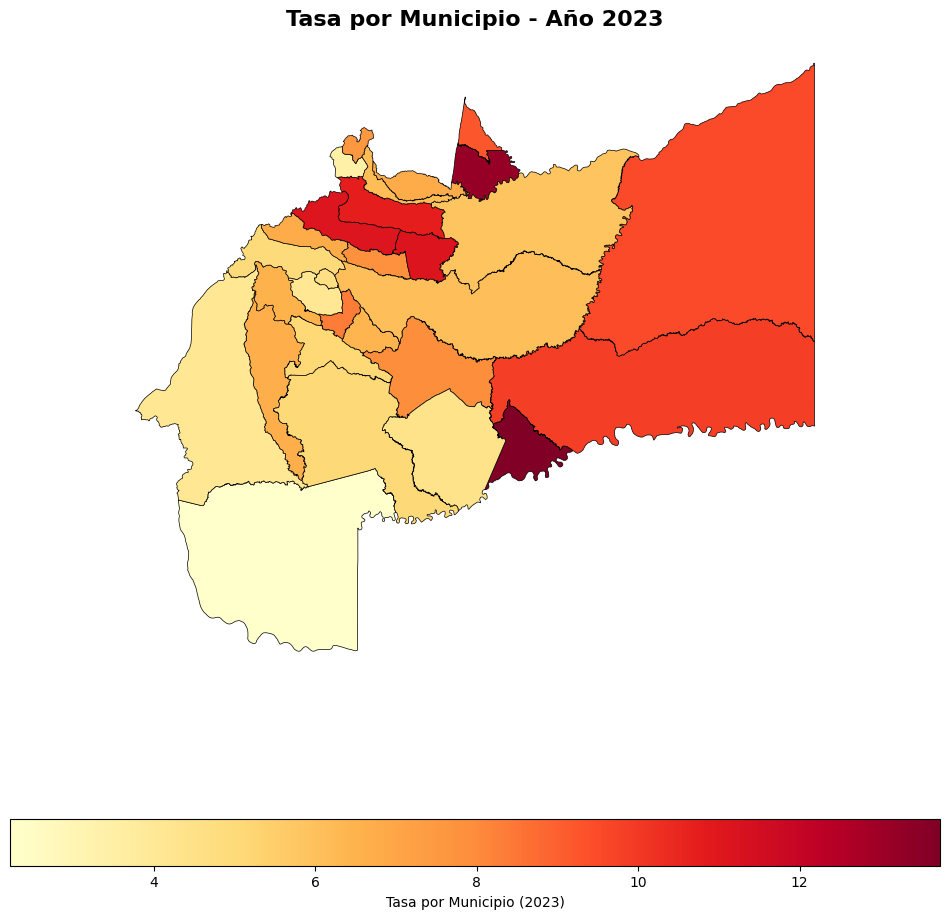

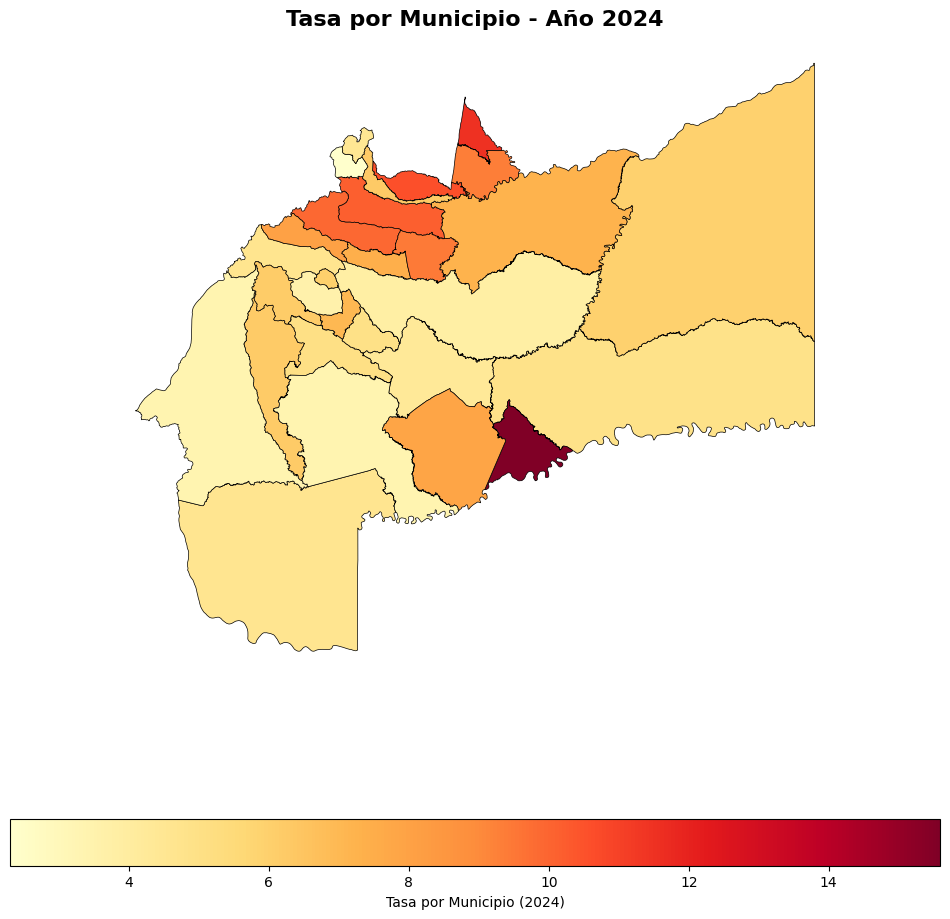

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Unir el DataFrame pivotado con la base geográfica
gdf_comb = gdf_meta.merge(df_pivot, left_on='MPIO_CNMBR', right_on='MPIO_CNMBR', how='left')  # Ajustado para usar la clave correcta

# Asegurarnos de que la geometría esté en el CRS correcto (WGS84: EPSG:4326)
gdf_comb = gdf_comb.to_crs(epsg=4326)

# Función para crear un mapa para un año específico
def plot_map_for_year(gdf, year, title):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Seleccionar la columna correspondiente al año
    column = f'tasa_{year}'

    # Verificar si la columna existe
    if column not in gdf.columns:
        print(f"Advertencia: La columna {column} no existe en los datos.")
        return

    # Crear el mapa
    gdf.plot(column=column, ax=ax, legend=True,
             legend_kwds={'label': f"Tasa por Municipio ({year})", 'orientation': "horizontal"},
             cmap='YlOrRd', edgecolor='black', linewidth=0.5)

    # Configurar el título y los ejes
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.axis('off')  # Ocultar los ejes

    # Mostrar el mapa
    plt.show()

# Extraer los años disponibles del DataFrame pivotado
años_disponibles = [col.split('_')[1] for col in df_pivot.columns if col.startswith('tasa_')]

# Iterar sobre los años y generar mapas
for year in años_disponibles:
    plot_map_for_year(gdf_comb, year, title=f"Tasa por Municipio - Año {year}")


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import imageio
import os
from matplotlib import colors

# Crear una carpeta temporal para almacenar las imágenes
os.makedirs("map_images", exist_ok=True)

# Determinar el rango fijo (mínimo y máximo) basado en todas las tasas
tasa_min = df_pivot.filter(like='tasa_').min().min()  # Mínimo entre todos los años
tasa_max = df_pivot.filter(like='tasa_').max().max()  # Máximo entre todos los años

# Función para generar un mapa para un año específico y guardar como imagen
def save_map_for_year_with_labels(gdf, year, output_folder, title, note, vmin, vmax):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    column = f'tasa_{year}'  # Columna para el año específico

    # Normalización explícita de la escala de colores
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    # Crear el mapa con rango fijo (vmin, vmax)
    gdf.plot(column=column, ax=ax, legend=True,
             legend_kwds={'label': f"Tasa por Municipio ({year})", 'orientation': "horizontal"},
             cmap='YlOrRd', edgecolor='black', linewidth=0.5,
             norm=norm)  # Aplicar la normalización con el rango fijo

    # Añadir etiquetas de los nombres de municipios
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['MPIO_CNMBR']):
        ax.text(x, y, label, fontsize=7, ha='center', color='black', alpha=0.7)

    # Configurar título y nota
    ax.set_title(title, fontsize=16, fontweight='bold', loc='center', pad=20)
    ax.annotate(note, xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10, style='italic')

    # Mostrar el año grande en la esquina superior izquierda
    ax.text(0.02, 0.98, f"{year}", transform=ax.transAxes, fontsize=24, fontweight='bold',
            color='darkred', va='top', ha='left', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    ax.axis('off')  # Ocultar ejes

    # Guardar la imagen
    output_path = os.path.join(output_folder, f"map_{year}.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Generar los mapas para todos los años y guardarlos como imágenes
años_disponibles = [int(col.split('_')[1]) for col in df_pivot.columns if col.startswith('tasa')]
output_folder = "map_images"
title = "Tasa mujeres víctimas de VBG por cada 1.000\nDepartamento del Meta (2015-2024)"
note = "Fuente: Nelson Mantilla con datos de la FGN"

for year in años_disponibles:
    save_map_for_year_with_labels(gdf_comb, year, output_folder, title, note, vmin=tasa_min, vmax=tasa_max)

# Crear el GIF
images = []
for year in sorted(años_disponibles):
    image_path = os.path.join(output_folder, f"map_{year}.png")
    images.append(imageio.imread(image_path))

# Guardar el GIF con repetición infinita
output_gif_path = "Tasa_VBG_Meta_2015_2024.gif"
imageio.mimsave(output_gif_path, images, duration=500, loop=0)  # loop=0 asegura repetición infinita

# Limpieza opcional: eliminar las imágenes temporales
import shutil
shutil.rmtree(output_folder)

print(f"¡GIF creado con éxito y guardado en {output_gif_path}!")




<ipython-input-36-7d075f5cac29>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['MPIO_CNMBR']):
<ipython-input-36-7d075f5cac29>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['MPIO_CNMBR']):
<ipython-input-36-7d075f5cac29>:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['MPIO_CNMBR']):
<ipython-input-36-7d075f5cac29>:29: UserWarning: Geo

¡GIF creado con éxito y guardado en Tasa_VBG_Meta_2015_2024.gif!


<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


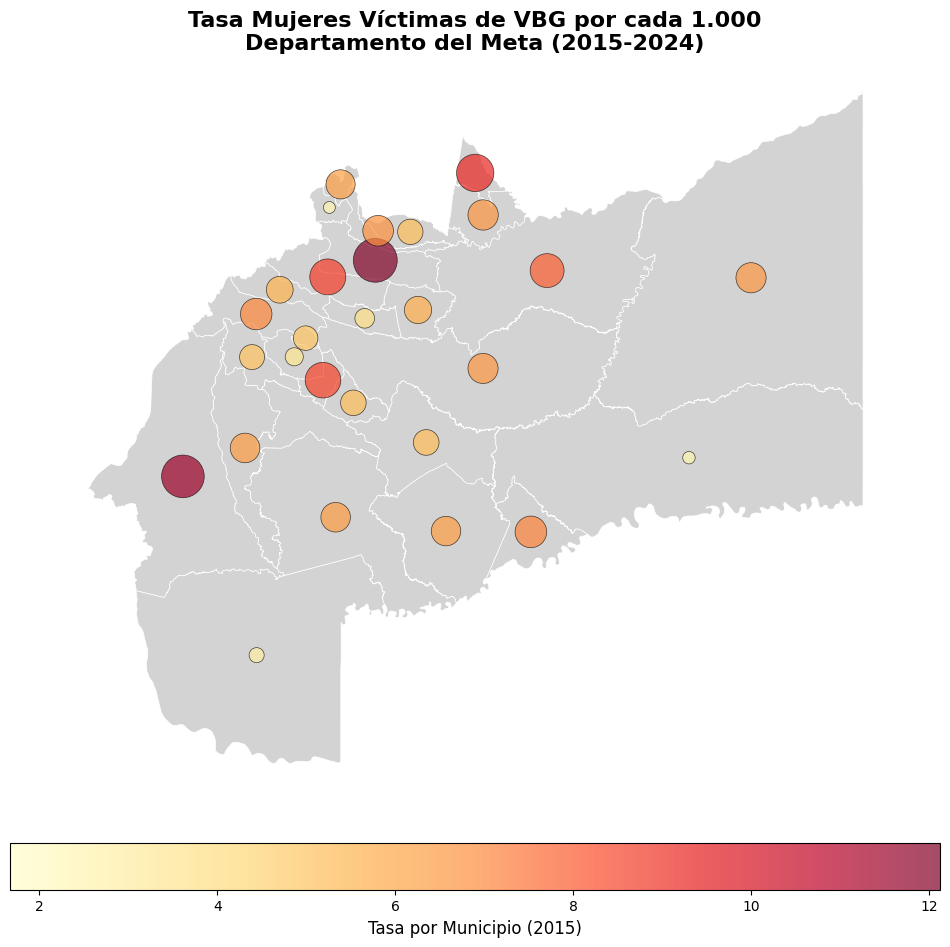

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


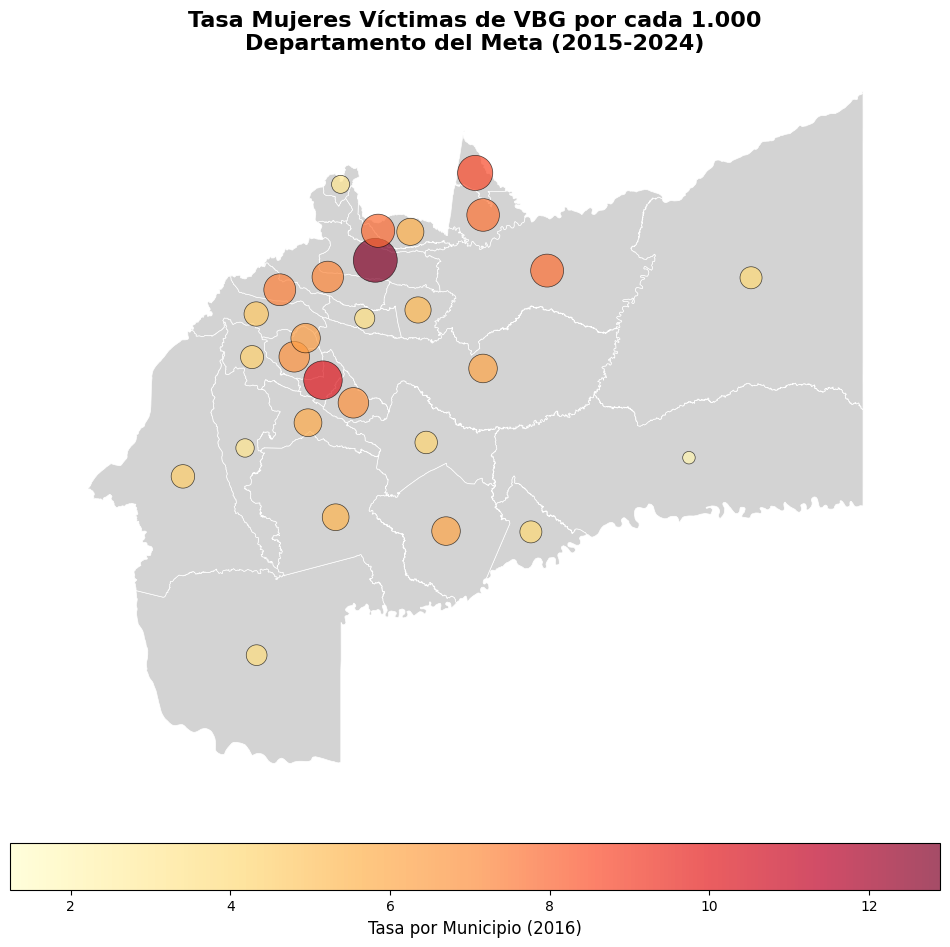

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


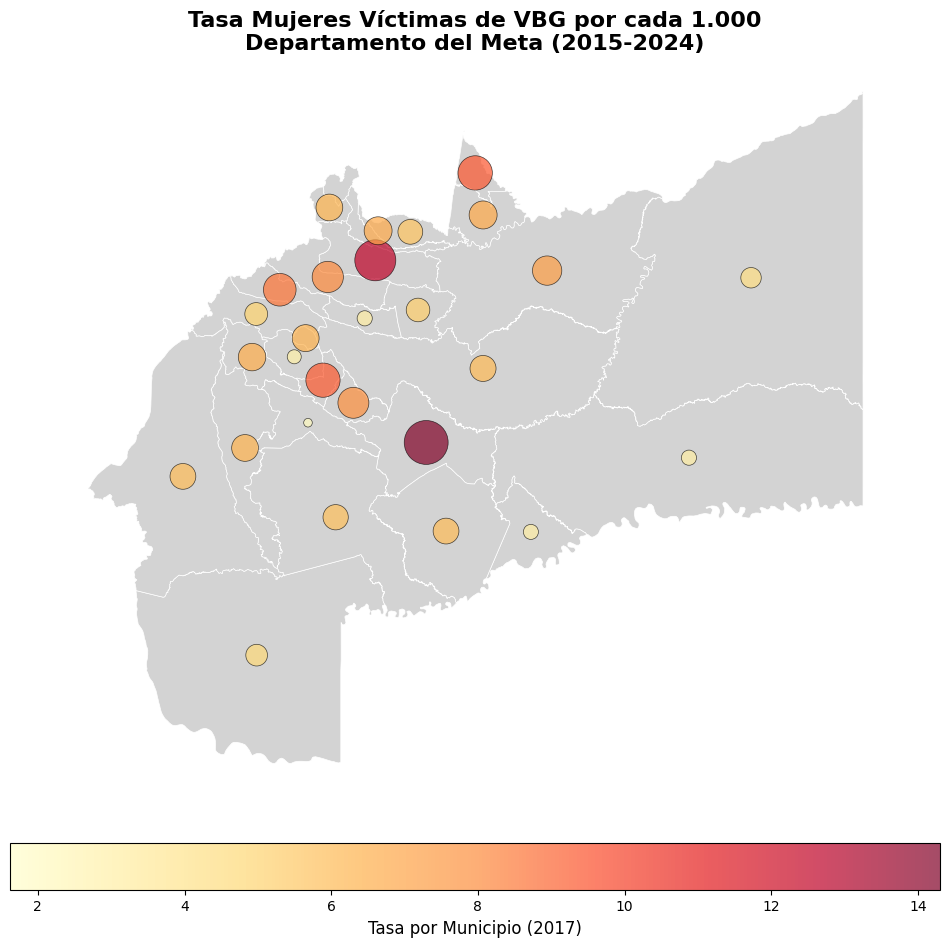

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


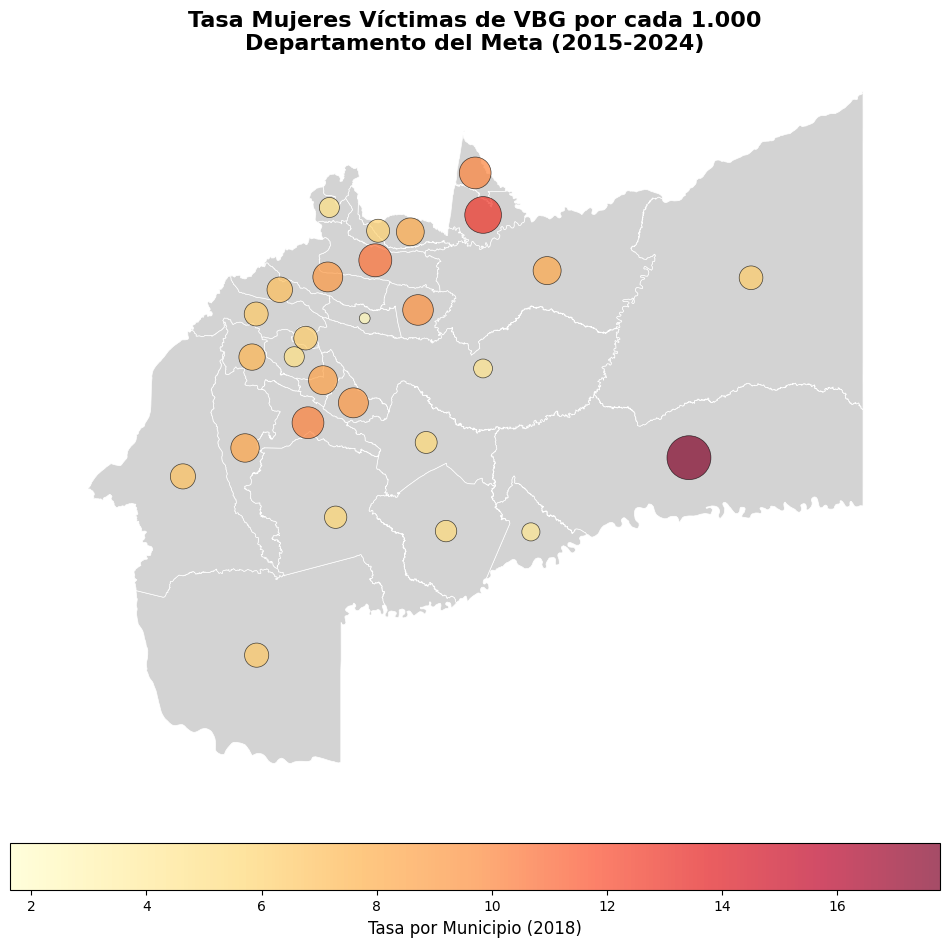

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


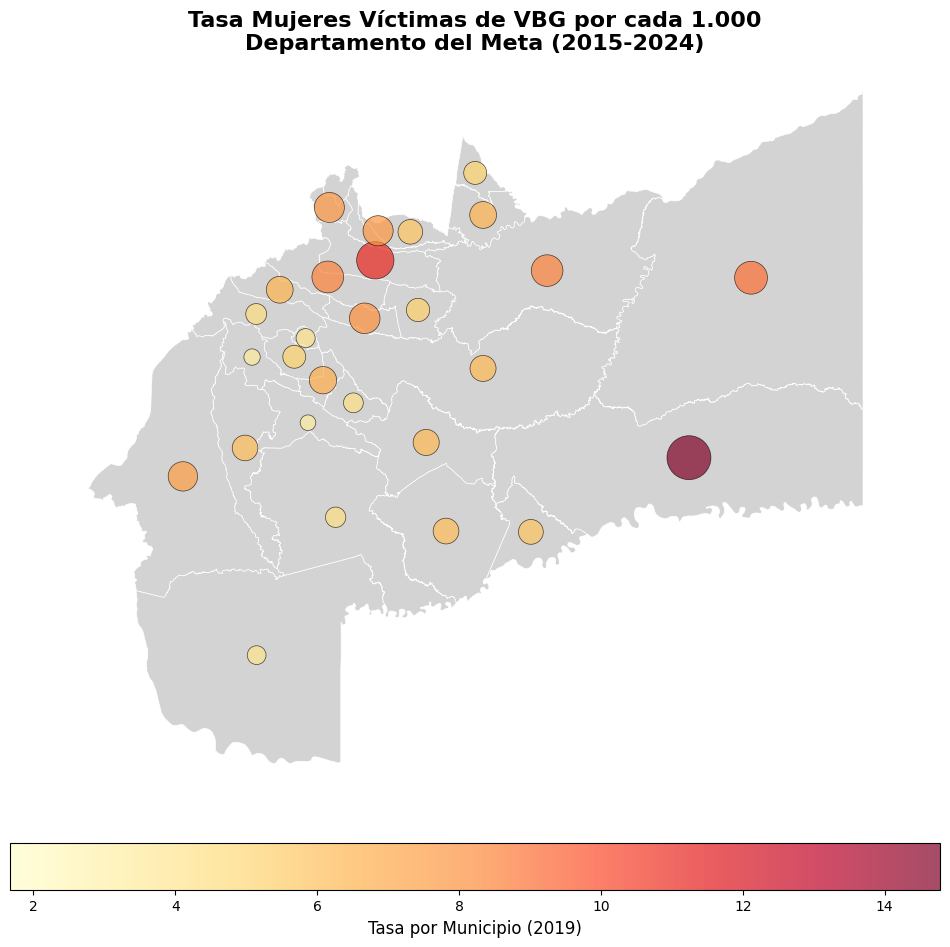

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


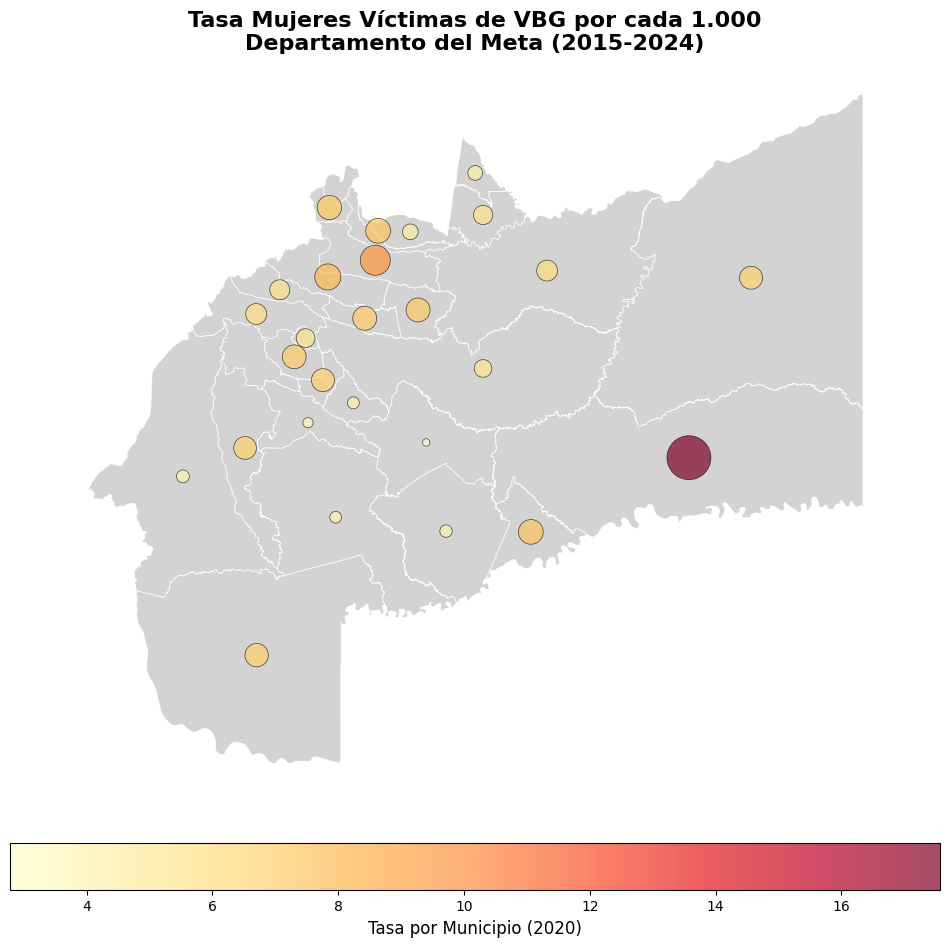

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


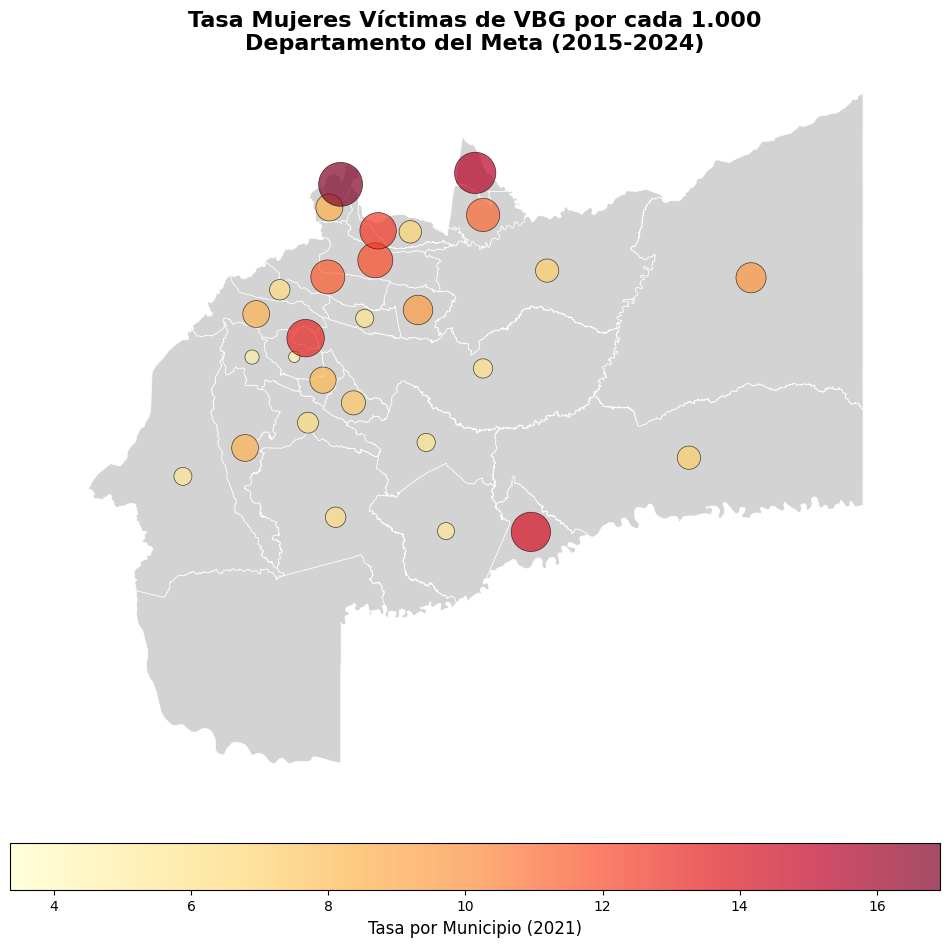

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


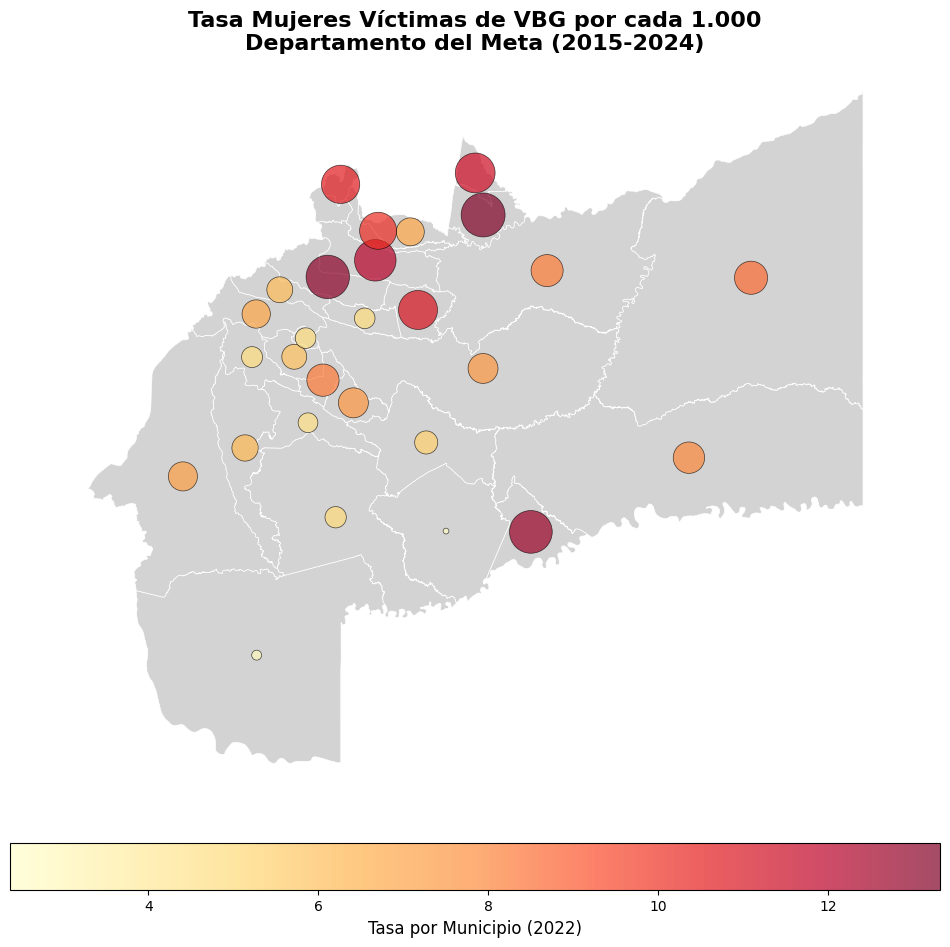

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


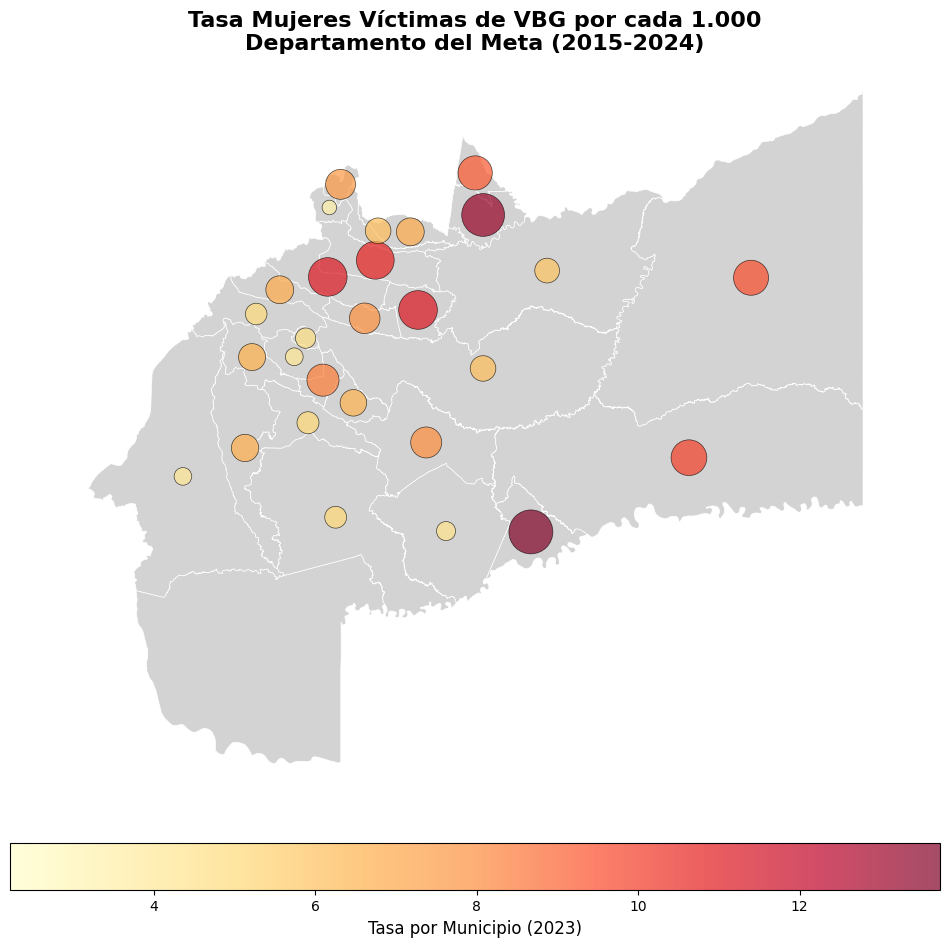

<ipython-input-23-912d07253fa6>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-23-912d07253fa6>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


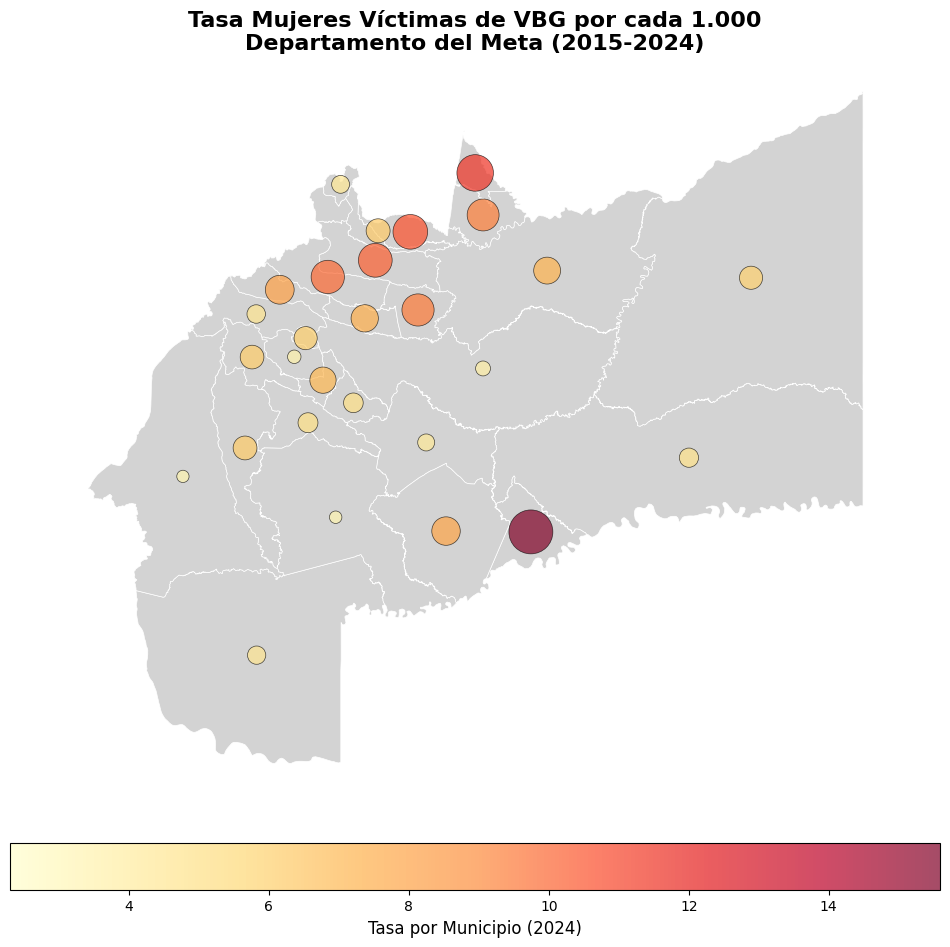

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Función para crear un mapa de burbujas de calor para un año específico
def plot_bubble_map_for_year(gdf, year, title, vmin, vmax):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Seleccionar la columna correspondiente al año
    column = f'tasa_{year}'

    # Verificar si la columna existe
    if column not in gdf.columns:
        print(f"Advertencia: La columna {column} no existe en los datos.")
        return

    # Obtener los centroides de los municipios
    gdf['centroid_x'] = gdf.geometry.centroid.x
    gdf['centroid_y'] = gdf.geometry.centroid.y

    # Normalizar los valores para definir tamaños de burbujas
    sizes = (gdf[column] - gdf[column].min()) / (gdf[column].max() - gdf[column].min())
    sizes = sizes * 1000  # Escalar los tamaños (ajusta según prefieras)

    # Crear el mapa base con límites municipales
    gdf.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)

    # Añadir las burbujas de calor
    scatter = ax.scatter(
        gdf['centroid_x'],
        gdf['centroid_y'],
        s=sizes,  # Tamaño proporcional a la tasa
        c=gdf[column],  # Color basado en la tasa
        cmap='YlOrRd',  # Mapa de colores
        alpha=0.7,  # Transparencia
        edgecolors='black',  # Borde de las burbujas
        linewidth=0.5
    )

    # Añadir la barra de colores
    cbar = fig.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label(f'Tasa por Municipio ({year})', fontsize=12)

    # Configurar el título
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.axis('off')  # Ocultar los ejes

    # Mostrar el mapa
    plt.show()

# Generar mapas para todos los años disponibles
title = "Tasa Mujeres Víctimas de VBG por cada 1.000\nDepartamento del Meta (2015-2024)"
for year in años_disponibles:
    plot_bubble_map_for_year(gdf_comb, year, title, vmin=tasa_min, vmax=tasa_max)


In [ ]:
import matplotlib.pyplot as plt
import imageio
import os
import shutil

# Crear una carpeta para almacenar las imágenes
os.makedirs("bubble_images", exist_ok=True)

# Determinar el rango fijo (mínimo y máximo) basado en todas las tasas
tasa_min = df_pivot.filter(like='tasa_').min().min()  # Mínimo entre todos los años
tasa_max = df_pivot.filter(like='tasa_').max().max()  # Máximo entre todos los años

# Función para guardar los mapas como imágenes
def save_bubble_map_for_year(gdf, year, output_folder, title, note, vmin, vmax):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    column = f'tasa_{year}'

    # Verificar si la columna existe
    if column not in gdf.columns:
        print(f"Advertencia: La columna {column} no existe en los datos.")
        return

    # Obtener los centroides de los municipios
    gdf['centroid_x'] = gdf.geometry.centroid.x
    gdf['centroid_y'] = gdf.geometry.centroid.y

    # Normalizar los valores para definir tamaños de burbujas
    sizes = (gdf[column] - gdf[column].min()) / (gdf[column].max() - gdf[column].min())
    sizes = sizes * 1000  # Escalar los tamaños (ajusta según prefieras)

    # Crear el mapa base con límites municipales
    gdf.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)

    # Añadir las burbujas de calor
    scatter = ax.scatter(
        gdf['centroid_x'],
        gdf['centroid_y'],
        s=sizes,  # Tamaño proporcional a la tasa
        c=gdf[column],  # Color basado en la tasa
        cmap='YlOrRd',  # Mapa de colores
        alpha=0.7,  # Transparencia
        edgecolors='black',  # Borde de las burbujas
        linewidth=0.5,
        vmin=vmin, vmax=vmax  # Fijar el rango de colores
    )

    # Añadir la barra de colores
    cbar = fig.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label(f'Tasa por Municipio ({year})', fontsize=12)

    # Configurar el título
    ax.set_title(title, fontsize=16, fontweight='bold')

    # Añadir la nota como anotación en la parte inferior
    ax.annotate(note, xy=(0.5, 0), xycoords='axes fraction', ha='center', fontsize=10, style='italic', color='black', weight='bold')

    # Añadir el año como texto grande en la esquina superior izquierda
    ax.text(0.02, 0.98, f"{year}", transform=ax.transAxes, fontsize=24, fontweight='bold',
            color='darkred', va='top', ha='left', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Ajustar el límite para asegurarse de que la nota quede dentro del área visible
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())

    ax.axis('off')  # Ocultar los ejes

    # Guardar la imagen
    output_path = os.path.join(output_folder, f"bubble_map_{year}.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Crear el GIF
images = []
output_folder = "bubble_images"
title = "Tasa Mujeres Víctimas de VBG por cada 1.000\nDepartamento del Meta (2015-2024)"
note = "Fuente: Nelson Mantilla con datos de la FGN y el DANE"

# Guardar los mapas de burbujas por cada año
for year in años_disponibles:
    save_bubble_map_for_year(gdf_comb, year, output_folder, title, note, vmin=tasa_min, vmax=tasa_max)

# Leer las imágenes guardadas y generar el GIF
for year in sorted(años_disponibles):
    image_path = os.path.join(output_folder, f"bubble_map_{year}.png")
    images.append(imageio.imread(image_path))

# Crear el GIF y guardarlo
output_gif_path = "Tasa_VBG_Burbujas_Meta_2015_2024.gif"
imageio.mimsave(output_gif_path, images, duration=500, loop=0)  # duration=1 es la duración entre cada frame en segundos

# Limpiar las imágenes temporales
shutil.rmtree(output_folder)

print(f"¡GIF creado con éxito y guardado en {output_gif_path}!")



<ipython-input-34-966f49607339>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-34-966f49607339>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y
<ipython-input-34-966f49607339>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
<ipython-input-34-966f49607339>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS be

¡GIF creado con éxito y guardado en Tasa_VBG_Burbujas_Meta_2015_2024.gif!
